# **Fraud Analytics in E-Wallet Systems: Recall-Driven Analysis of Online Gambling Transactions**

by Faaza Naima

# 1. Business Understanding

**Context**
Recently, there has been a significant surge in online gambling transactions in Indonesia through E-Money services and digital wallets. Payment service providers are required to report and block these transactions to comply with regulations and avoid the risk of fines and reputational damage. The dataset contains anonymized financial transactions, with some labeled as reported (confirmed fraud) and others as unidentified (potentially hidden fraud).

**Problem Statement**
- How can we identify patterns of online gambling transactions and distinguish them from normal ones using exploratory and statistical approaches?
- How can we build a model to predict fraud using reported as ground truth and unidentified as unknown?

**Goals**
1. Identify patterns of online gambling transactions using exploratory data analysis (EDA) and statistical methods.
2. Develop a predictive model to classify transactions as reported (fraud) or unidentified (potentially hidden fraud).

**Analytic Approach**
1. Descriptive Analytics

    Goal: Understand what is happening in the data
    - Business Understanding
    - Data Understanding
2. Diagnostic Analytics

    Goal : Understand why patterns or anomalies occur — dive into behavioral insights and correlation.
    - Behavior Profiling
    - Correlation Analysis
3. Predictive Analytics
    
    Goal: Translate model output into actionable decisions.
    - Supervised Machine Learning : Predict likelihood of fraud for each transaction.
    - Semi-supervised / Anomaly Detection

    > Algorithms: Isolation Forest and AdaBoost

**Metric Evaluation**

In fraud detection, especially with class imbalance (e.g., <10% fraud rate), traditional metrics like accuracy or even F1 may not reflect model performance properly. **F2 Score is more appropriate** because it gives **higher weight to recall**, which is critical when the **cost of missing fraud (False Negatives)** is much higher than blocking a few legitimate transactions (False Positives).

1. Confusion Matrix

    |                          | **Predicted: Non-Fraud (0)** | **Predicted: Fraud (1)** |
    |--------------------------|-------------------------------|---------------------------|
    | **Actual: Non-Fraud (0)**| **True Negative (TN)**      | **False Positive (FP)**|
    | **Actual: Fraud (1)**    | **False Negative (FN)**     | **True Positive (TP)** |

    Explanation 
    - TP : Fraudulent (gambling) transaction correctly flagged  
    - FP : Legitimate transaction incorrectly flagged as fraud  
    - FN : Fraudulent transaction missed (not detected)  
    - TN : Legitimate transaction correctly classified as non-fraud  

2.  F-beta Score Formula

    Fβ = (1 + β²) × (Precision × Recall) / (β² × Precision + Recall)

    - `β = 1` → F1 (equal weight to precision and recall)  
    - `β = 2` → **F2 (recall is 4× more important than precision)**  
    - `β = 0.5` → F0.5 (precision is prioritized)

3. Why F2 in Fraud Use Cases?
    - The class is highly imbalanced (e.g., <10% labeled fraud)
    - The **cost of missing fraud** is significantly higher than the cost of wrongly flagging normal transactions*
    - We need to tune the model for **higher recall without completely sacrificing precision**

    | Problem                        | Implication                          | Metric Response     |
    |-------------------------------|--------------------------------------|---------------------|
    | Fraud cases are rare          | Class imbalance                      | Accuracy is useless |
    | Missing fraud costs money     | High cost of False Negatives (FN)    | Recall prioritized  |
    | Too many false positives hurt | But not as much as missing fraud     | Precision managed   |
    | Business goal: catch more fraud | Allow some FP to reduce FN          | Use F2 score        |

        * Notes: False Negative (FN) cost is 10× to 100× higher than False Positive (FP) (based on both industry estimates and academic literature)

3. How to Calculate the Investigation Cost?
    - Without Model
        - Assuming all transactions are manually reviewed, the total cost is purely investigation

            Total Cost = (TP+TN+FP+FN) × C_investigasi
    - With Model 
        - Only transactions predicted as fraud (pred = 1) are investigated. Fraud that goes undetected (FN) results in financial loss.

            Total Cost = (TP + FP) × C_investigasi
            Wasted_Cost = FP x × C_investigasi
            Financial Loss = FN × C_fraud_loss

4. Calculation Cost

    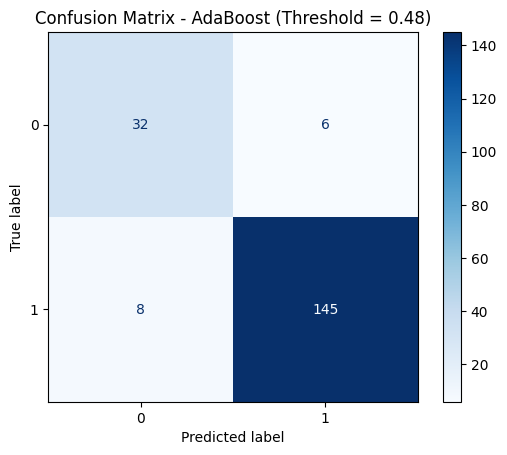

    Will be calculated in conclusion part.

# 2. Data Understanding

#### **Fraud Detection Dataset Documentation**

This dataset contains **financial transaction records** from LinkAja (modified), a digital wallet and financial services provider in Indonesia.  
Each row represents a **single transaction**, capturing various fields such as sender/receiver IDs, transaction types, timestamps, amounts, fees, reasons, linked reversal information, and sharia compliance indicators.

> Note: The `label` column contains categorical values (`unidentified`, `reported`) and is **binary flag by default**.

### **Attribute Information**

| Attribute | Data Type | Description |
|---------|-----------|-------------|
| `orderid` | object | Unique identifier for the transaction |
| `trans_status` | object | Transaction status (`completed`, `failed`, etc.) |
| `trans_initiate_time` | object | Timestamp when transaction was initiated |
| `trans_end_time` | object | Timestamp when transaction was completed |
| `debit_party_id` | object | Identifier of the sender |
| `debit_party_type` | object | Type of sender (`merchant` or `customer`) |
| `debit_party_account` | object | Account number of sender |
| `debit_party_mnemonic` | object | Alias or label for sender |
| `credit_party_id` | object | Identifier of the recipient |
| `credit_party_type` | object | Type of recipient (`merchant`, `customer`, `system`) |
| `credit_party_account` | object | Account number of recipient |
| `credit_party_mnemonic` | object | Alias or label for recipient |
| `trans_amount` | int64 | Transaction amount (in IDR) |
| `fee` | float64 | Transaction fee charged |
| `commission` | float64 | Commission taken from the transaction |
| `discount_amount` | int64 | Discount applied (if any) |
| `redeemed_point_amount` | float64 | Redeemed points amount |
| `redeemed_point_type` | object | Type of redeemed points |
| `currency` | object | Currency used (e.g., `IDR`) |
| `is_reversed` | bool | Whether transaction was reversed |
| `is_partial_reversed` | bool | Whether partially reversed (always False) |
| `is_reversal` | object | Whether this is a reversal transaction |
| `linked_type` | object | Type of link to another transaction (`Reversal`) |
| `linked_orderid` | object | Linked transaction ID |
| `linkedorder_createtime` | object | Creation time of linked transaction |
| `linkedorder_endtime` | object | Completion time of linked transaction |
| `reason_type` | float64 | Numeric code for reason |
| `reason_name` | object | Human-readable reason for transaction |
| `transaction_type` | object | Type/category of transaction |
| `remark` | object | Additional remarks or notes |
| `channel` | object | Transaction channel (`API`, `USSD`, etc.) |
| `initiator_id` | object | ID of transaction initiator |
| `initiator_mnemonic` | object | Alias/label of the initiator |
| `reason` | object | Textual reason behind the transaction |
| `thirdpartyid` | object | Involved third-party ID |
| `error_message` | object | Error message if the transaction failed |
| `derived_orderid` | float64 | Derived order ID (empty, not used) |
| `debit_user_sharia` | bool | Indicates if sender is sharia-compliant user |
| `credit_user_sharia` | bool | Indicates if recipient is sharia-compliant user |
| `is_sharia` | bool | Indicates if transaction is sharia-compliant |
| `label` | object | Target label (`unidentified`, `reported`) |



## a. Libraries and Overall Data Basic Understanding

In [350]:
# ============================
# 1. Basic Setup
# ============================
import sys
import time
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# ============================
# 2. EDA & Statistical Tools
# ============================
from ydata_profiling import ProfileReport
from scipy.stats import kruskal, spearmanr

# ============================
# 3. Preprocessing & Pipeline
# ============================
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer

# ============================
# 4. Model Evaluation Metrics
# ============================
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    fbeta_score,
    average_precision_score,
    precision_recall_curve,
    confusion_matrix,
    ConfusionMatrixDisplay,
    classification_report,
    make_scorer
)

# ============================
# 5. Model Selection
# ============================
from sklearn.model_selection import train_test_split, GridSearchCV

# ============================
# 6. Machine Learning Models
# ============================

## Linear Models
from sklearn.linear_model import LogisticRegression

## Tree-based Models
from sklearn.ensemble import (
    RandomForestClassifier,
    GradientBoostingClassifier,
    HistGradientBoostingClassifier,
    AdaBoostClassifier,
    AdaBoostRegressor,
    BaggingClassifier,
    IsolationForest
)
from sklearn.tree import plot_tree

## Boosting Frameworks
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# ============================
# 7. Explainability Tools
# ============================
import shap
from sklearn.inspection import permutation_importance

In [19]:
df_raw = pd.read_csv('dataset.csv')
df = df_raw.copy()
df.head()

,orderid,trans_status,trans_initiate_time,trans_end_time,debit_party_id,debit_party_type,debit_party_account,debit_party_mnemonic,credit_party_id,credit_party_type,credit_party_account,credit_party_mnemonic,trans_amount,fee,commission,discount_amount,redeemed_point_amount,redeemed_point_type,currency,is_reversed,is_reversal,is_partial_reversed,linked_type,linked_orderid,derived_orderid,reason_type,reason_name,transaction_type,remark,channel,initiator_id,initiator_mnemonic,reason,thirdpartyid,linkedorder_createtime,linkedorder_endtime,error_message,debit_user_sharia,credit_user_sharia,is_sharia,label
0,9DIxxxxU13,completed,2022-04-18 20:44:16,2022-04-18 20:44:16,201xxxxxxxxxxxx700,merchant,500xxxxxxxxxxxx136,628xxxxxxxx12 - CUxxxxxxxELL,201xxxxxxxxxxxx864,merchant,500xxxxxxxxxxxx736,111xxx- 11xxx-BIRxxxxxxxxxxxxPI),920,0.0,0.0,0,NaN,NaN,IDR,False,False,False,NaN,NaN,NaN,10003438.0,Digital point-of-sales B2B Transfer,Business to Business Transfer,NaN,API,203xxxxxxxxxxxx744,CUTxxxxxxxxxxxxxxxxxxxx412,NaN,Digital point-of-sales,NaN,NaN,NaN,False,False,False,unidentified
1,BGWxxxxKV3,completed,2022-09-28 15:41:28,2022-09-28 15:41:28,202xxxxxxxxxxxx292,customer,100xxxxxxxxxxxx440,628xxxxxxx10 - PAxxxxxxxxxxxxxxxxxxx SI,201xxxxxxxxxxxx496,merchant,500xxxxxxxxxxxx360,tapxxsh - TOxxxxxxxxxxASH,50000,1500.0,0.0,0,NaN,NaN,IDR,False,False,False,NaN,NaN,NaN,10003715.0,Customer Top Up Electronic Money Chip Based by...,Customer Buy Goods,BuyGoodsKUE,API,202xxxxxxxxxxxx304,628xxxxxxx10 - PAxxxxxxxxxxxxxxxxxxx SI,BuyGoodsKUE,NaN,NaN,NaN,NaN,False,False,False,unidentified
2,C4Dxxxx921,completed,2023-08-07 21:58:49,2023-08-07 21:58:49,202xxxxxxxxxxxx886,customer,100xxxxxxxxxxxx960,628xxxxxxx560-IPAxxxxxxPAH,202xxxxxxxxxxxx944,customer,100xxxxxxxxxxxx920,628xxxxxxx450-Sxxx,19000,0.0,0.0,0,NaN,NaN,IDR,False,False,False,NaN,NaN,NaN,10003782.0,Customer Transfer E-Money to Registered Customer,Customer Withdrawal,SendMoney,API,202xxxxxxxxxxxx880,628xxxxxxx560-IPAxxxxxxPAH,SendMoney,NaN,NaN,NaN,NaN,False,True,True,reported
3,7EGxxxxML2,completed,2020-05-16 9:25:38,2020-05-16 9:25:38,201xxxxxxxxxxxx278,merchant,500xxxxxxxxxxxx984,628xxxxxxxx57 - AUxxxxxELL-230xxxx663,201xxxxxxxxxxxx288,merchant,500xxxxxxxxxxxx648,211xxx- 21xxx-JAKxxxxxxxxxxxxxxxxxxxxxxxxxxxxx...,20200,0.0,0.0,0,NaN,NaN,IDR,False,False,False,NaN,NaN,NaN,10003438.0,Digital point-of-sales B2B Transfer,Business to Business Transfer,NaN,API,203xxxxxxxxxxxx504,AUFxxxxELL-230xxxxxxxxxxxxxxxxxx157,NaN,Digital point-of-sales,NaN,NaN,NaN,False,False,False,unidentified
4,C4Dxxxx104,completed,2023-08-09 15:06:09,2023-08-09 15:06:09,202xxxxxxxxxxxx376,customer,200xxxxxxxxxxx000,628xxxxxxx684-AHMxxxxxxxxRDI,202xxxxxxxxxxxx000,customer,200xxxxxxxxxxx280,628xxxxxxx119-MEIxxxxxxxxxxxxARI,40000,0.0,0.0,0,NaN,NaN,IDR,False,False,False,NaN,NaN,NaN,10003782.0,Customer Transfer E-Money to Registered Customer,Customer Withdrawal,SendMoney,API,202xxxxxxxxxxxx368,628xxxxxxx684-AHMxxxxxxxxRDI,SendMoney,NaN,NaN,NaN,NaN,False,False,False,unidentified


In [20]:
print(f'The dataset contains {df.shape[0]} rows and {df.shape[1]} columns.')

The dataset contains 1000 rows and 41 columns.


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 41 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   orderid                 1000 non-null   object 
 1   trans_status            1000 non-null   object 
 2   trans_initiate_time     1000 non-null   object 
 3   trans_end_time          1000 non-null   object 
 4   debit_party_id          1000 non-null   object 
 5   debit_party_type        1000 non-null   object 
 6   debit_party_account     1000 non-null   object 
 7   debit_party_mnemonic    1000 non-null   object 
 8   credit_party_id         1000 non-null   object 
 9   credit_party_type       996 non-null    object 
 10  credit_party_account    1000 non-null   object 
 11  credit_party_mnemonic   996 non-null    object 
 12  trans_amount            1000 non-null   int64  
 13  fee                     1000 non-null   float64
 14  commission              1000 non-null   f

### **Checking Duplicates**

In [22]:
# Check for duplicates
duplicated = df.duplicated().sum()

if duplicated > 0:
    print(f'The dataset contains {duplicated} duplicated rows.')
else:
    print('The dataset does not contain any duplicated rows.')

The dataset does not contain any duplicated rows.


### **Data Profiling**

In [23]:
# # Create the profiling report
# profile = ProfileReport(
#     df,
#     title="E-Money Fraud Detection Profiling Report",
#     explorative=True
# )
# # profile.to_file("fraud_profiling_report.html")
# profile.to_notebook_iframe()

## b. Basic Understanding The Relevant Data

In [24]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
trans_amount,1000.0,9.167013e+04,300037.908975,1.0,10000.0,25000.0,50108.75,5000000.0
fee,1000.0,1.248913e+02,442.512785,0.0,0.0,0.0,20.00,6526.0
commission,1000.0,1.253405e+01,128.451704,0.0,0.0,0.0,0.00,2930.0
discount_amount,1000.0,0.000000e+00,0.000000,0.0,0.0,0.0,0.00,0.0
redeemed_point_amount,24.0,2.566667e+03,5385.642480,0.0,0.0,0.0,3237.50,24000.0
derived_orderid,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
reason_type,984.0,1.000347e+07,437.252510,10002151.0,10003438.0,10003629.0,10003782.00,10003831.0


In [25]:
def info_detail(df):
    listItem = []

    for col in df.columns:
        # Get all unique values (excluding NaN)
        unique_vals = df[col].dropna().unique()

        listItem.append([
            col, 
            df[col].dtype, 
            df[col].isna().sum(), 
            round((df[col].isna().sum() / len(df)) * 100, 2),
            df[col].nunique(), 
            unique_vals
        ])

    df_desc = pd.DataFrame(
        columns=['feature', 'dataType', 'nullCount', 'nullPct', 'uniqueCount', 'UniqueValues'],
        data=listItem
    )
    return df_desc.sort_values(by='nullCount', ascending=False)

In [26]:
# Check for datatypes, missing values, number of unique values, and a sample of unique values
info_detail(df)

,feature,dataType,nullCount,nullPct,uniqueCount,UniqueValues
24,derived_orderid,float64,1000,100.0,0,[]
22,linked_type,object,999,99.9,1,[Reversal]
35,linkedorder_endtime,object,995,99.5,5,"[2020-08-18 23:07:30, 2023-07-08 20:20:44, 202..."
34,linkedorder_createtime,object,995,99.5,5,"[2020-08-18 23:07:30, 2023-07-08 20:20:44, 202..."
23,linked_orderid,object,995,99.5,5,"[7HIxxxxGSJ, C4AxxxxC12, C57xxxxA0L, BDNxxxxDQ..."
17,redeemed_point_type,object,993,99.3,1,[Saldo Bonus]
16,redeemed_point_amount,float64,976,97.6,7,"[2650.0, 0.0, 7950.0, 2000.0, 24000.0, 5000.0,..."
36,error_message,object,970,97.0,26,[BPCodeLimit : Max debit amount allowed per da...
28,remark,object,667,66.7,25,"[BuyGoodsKUE, SendMoney, WithdrawalDirectBank,..."
32,reason,object,572,57.2,46,"[BuyGoodsKUE, SendMoney, WithdrawalDirectBank,..."


### **Data Selection**

**Create is_error Flag from error_message Presence**

In [27]:
df['is_error'] = df['error_message'].notnull().astype(object)

In [28]:
df['error_message'] = df['error_message'].fillna('No error')

**Value Distribution Comparison: is_reversal vs is_reversed Columns**

In [29]:
print(df['is_reversal'].value_counts(dropna=False))
print(df['is_reversed'].value_counts(dropna=False))

is_reversal
False    948
NaN       51
True       1
Name: count, dtype: int64
is_reversed
False    996
True       4
Name: count, dtype: int64


- is_reversal has many missing values and few Trues, while is_reversed is clean and complete.
- We kept is_reversed as the reliable reversal indicator.

**is_sharia Matches OR of Debit and Credit Sharia Flags**

In [30]:
(df['is_sharia'] == (df['debit_user_sharia'] | df['credit_user_sharia'])).value_counts()

True    1000
Name: count, dtype: int64

- is_sharia is identical to debit_user_sharia or credit_user_sharia
- We dropped the other two

**Conclusion**:
- Columns with over 50% missing values are dropped because they lack sufficient data to be useful.
- Columns with only one unique value are dropped because they provide no informational value.
- Known redundant or noisy identifier columns are dropped to reduce dimensionality and improve data quality.

In [31]:
def drop_useless_columns(df, missing_threshold=0.5):
    """
    Drops columns from the DataFrame that are considered useless or redundant for analysis and modeling. Specifically, it removes columns that:
    
    1. Have more than `missing_threshold` proportion of missing values.
       - Columns with excessive missing data are unlikely to provide reliable information and may introduce noise.
    
    2. Contain only one unique (non-null) value.
       - Columns with no variability carry no predictive power and can be safely removed.
    
    3. Are known to be non-informative or redundant identifiers.
       - This includes IDs, account numbers, and mnemonic columns that do not contribute to modeling but increase dimensionality.
       - Examples include transaction IDs (`orderid`), reversal flags with noisy data (`is_reversal`), various account and party identifiers (`credit_party_account`, `debit_party_account`, `credit_party_id`, `debit_party_id`), and mnemonic identifiers.
       - Also drops sharia flags for debit and credit users when a combined `is_sharia` flag is available.
    
    """
    # Drop columns with too many missing values
    missing_cols = df.columns[df.isnull().mean() > missing_threshold]

    # Drop columns with only one unique (non-null) value
    low_variance_cols = df.nunique(dropna=True)[df.nunique(dropna=True) == 1].index

    # Manually defined useless/redundant columns to drop regardless of missingness or uniqueness
    manual_drop_cols = [
        'orderid', 'is_reversal',
        'credit_party_account', 'debit_party_account',
        'credit_party_id', 'debit_party_id',
        'initiator_id',
        'credit_party_mnemonic', 'debit_party_mnemonic', 'initiator_mnemonic',
        'debit_user_sharia', 'credit_user_sharia'
    ]

    # Combine all columns to drop
    cols_to_drop = list(set(missing_cols).union(set(low_variance_cols)).union(set(manual_drop_cols)))

    # Drop columns and return the cleaned DataFrame
    return df.drop(columns=cols_to_drop)


In [32]:
df = drop_useless_columns(df)

In [33]:
# Check for datatypes, missing values, number of unique values, and a sample of unique values
info_detail(df)

,feature,dataType,nullCount,nullPct,uniqueCount,UniqueValues
12,channel,object,57,5.7,3,"[API, USSD, System]"
11,transaction_type,object,19,1.9,30,"[Business to Business Transfer, Customer Buy G..."
9,reason_type,float64,16,1.6,65,"[10003438.0, 10003715.0, 10003782.0, 10003629...."
4,credit_party_type,object,4,0.4,3,"[merchant, customer, system]"
10,reason_name,object,4,0.4,51,"[Digital point-of-sales B2B Transfer, Customer..."
0,trans_status,object,0,0.0,4,"[completed, failed, declined, cancelled]"
15,label,object,0,0.0,2,"[unidentified, reported]"
14,is_sharia,bool,0,0.0,2,"[False, True]"
13,error_message,object,0,0.0,27,"[No error, BPCodeLimit : Max debit amount allo..."
8,is_reversed,bool,0,0.0,2,"[False, True]"


# 3. Data Cleaning

## a. Missing Value Treatment

**channel column**

In [34]:
print(df['channel'].value_counts(normalize=True, dropna=False) * 100)

channel
API       94.0
NaN        5.7
System     0.2
USSD       0.1
Name: proportion, dtype: float64


In [35]:
pd.crosstab(df['channel'].isnull(), df['label'])

label,reported,unidentified
channel,,
False,100,843
True,0,57


In [36]:
# Fill missing channel values with 'Unknown'
df['channel'] = df['channel'].fillna('Unknown')

-  Keep channel missing as a special category (Unknown) since missingness relates to unidentified label, dropping would lose signal.

**drop zero value at spesific columns**

In [37]:
df = df.dropna(subset=['reason_type', 'reason_name', 'credit_party_type', 'transaction_type'])

- Drop rows with nulls in critical columns because missingness is below 2% and we lack info or patterns to impute

## b. Handling Outliers

In [38]:
def detect_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    return outliers.shape[0], round(100 * outliers.shape[0] / df.shape[0], 2)

num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

for col in num_cols:
    if col != 'label': 
        count, pct = detect_outliers_iqr(df, col)
        print(f"{col}: {count} outliers ({pct}%)")

trans_amount: 98 outliers (10.04%)
fee: 175 outliers (17.93%)
commission: 23 outliers (2.36%)
reason_type: 129 outliers (13.22%)


In [39]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
trans_amount,976.0,9.002617e+04,299725.153992,1.0,10000.0,24743.0,50000.0,5000000.0
fee,976.0,1.279018e+02,447.499995,0.0,0.0,0.0,20.0,6526.0
commission,976.0,1.284226e+01,130.007800,0.0,0.0,0.0,0.0,2930.0
reason_type,976.0,1.000348e+07,435.711530,10002151.0,10003438.0,10003629.0,10003782.0,10003831.0


**trans_amount column**

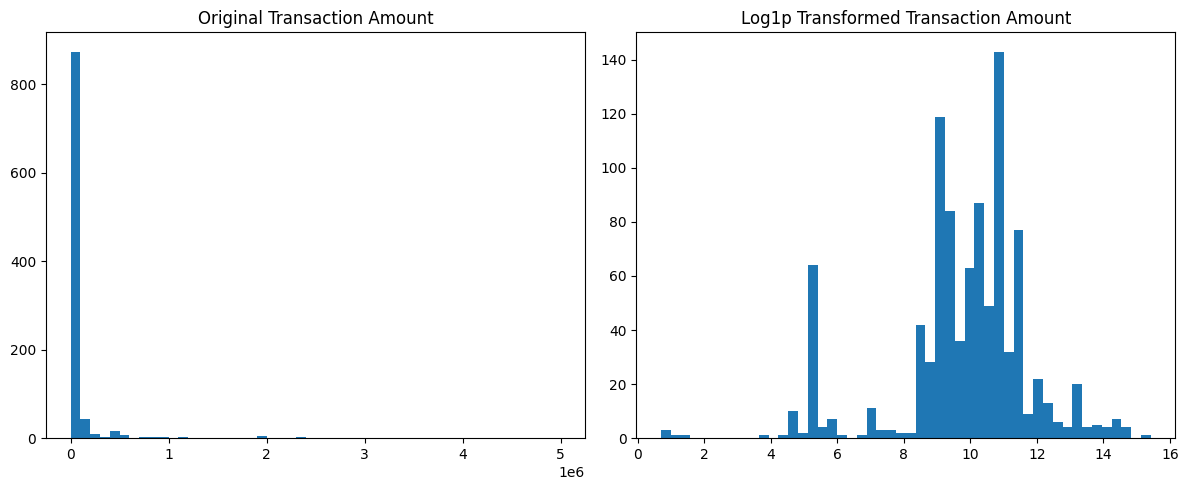

In [40]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.hist(df['trans_amount'], bins=50)
plt.title('Original Transaction Amount')

plt.subplot(1,2,2)
plt.hist(np.log1p(df['trans_amount']), bins=50)
plt.title('Log1p Transformed Transaction Amount')

plt.tight_layout()
plt.show()

**fee column**

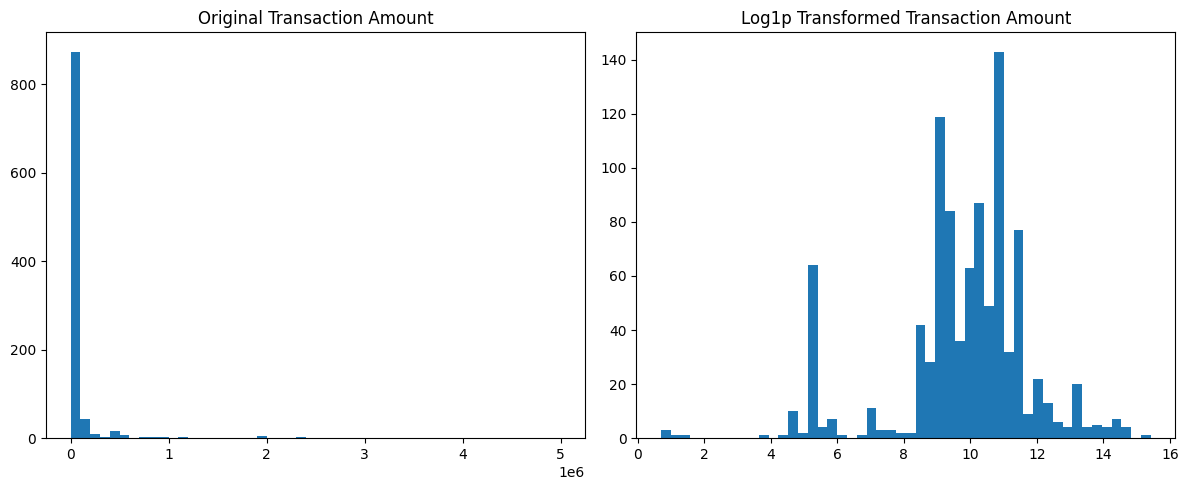

In [41]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.hist(df['trans_amount'], bins=50)
plt.title('Original Transaction Amount')

plt.subplot(1,2,2)
plt.hist(np.log1p(df['trans_amount']), bins=50)
plt.title('Log1p Transformed Transaction Amount')

plt.tight_layout()
plt.show()

In [42]:
outliers_fee_above_50 = df[df['fee'] > 50]
print(f"Total rows > 50: {len(outliers_fee_above_50)}")

Total rows > 50: 175


In [43]:
outliers_fee_above_50[outliers_fee_above_50['transaction_type'].isin(['Customer Withdrawal', 'Business to Business Transfer'])].head()

,trans_status,trans_initiate_time,trans_end_time,debit_party_type,credit_party_type,trans_amount,fee,commission,is_reversed,reason_type,reason_name,transaction_type,channel,error_message,is_sharia,label,is_error
6,completed,2023-09-17 23:50:22,2023-09-17 23:50:22,customer,merchant,2342153,2500.0,0.0,False,10003736.0,Customer Withdrawal at Bank,Customer Withdrawal,API,No error,False,reported,False
8,completed,2021-06-30 9:19:11,2021-06-30 9:19:11,merchant,merchant,500000,2950.0,2150.0,False,10002857.0,General B2B Transfer,Business to Business Transfer,API,No error,False,unidentified,False
10,completed,2023-01-08 20:10:52,2023-01-08 20:10:52,customer,merchant,49000,1000.0,0.0,False,10003736.0,Customer Withdrawal at Bank,Customer Withdrawal,API,No error,True,unidentified,False
24,completed,2023-11-02 7:27:29,2023-11-02 7:27:29,customer,merchant,1200000,2500.0,0.0,False,10003736.0,Customer Withdrawal at Bank,Customer Withdrawal,API,No error,False,unidentified,False
26,completed,2022-05-10 21:10:52,2022-05-10 21:10:53,merchant,merchant,20000,500.0,450.0,False,10003638.0,General to Purchase B2B Transfer Agent Off-us ...,Business to Business Transfer,Unknown,No error,False,unidentified,False


- Customer Withdrawals at Banks usually incur charges due to interbank transfer fees.
- Digital point-of-sales B2B transfers typically have a fixed fee of 200.
- We will keep the data and apply a log1p transformation.

**commission column**

In [44]:
Q1 = df['commission'].quantile(0.25)
Q3 = df['commission'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['commission'] >= lower_bound) & (df['commission'] <= upper_bound)]

- We dropped missing values in the commission column because 2.36% of the entries were identified as outliers

## c. Casting data types & Fix Inconsistent

In [45]:
df.columns = (
    df.columns.str
    .strip() # remove whitespace
    .str.lower() # lowercase
    .str.replace(' ', '_') # spaces to underscores
    .str.replace('-', '_') # hyphens to underscores
    .str.replace(r'[^a-z0-9_]', '', regex=True)  # keep letters, digits, underscores only
)

**Final Data**

In [46]:
data= df.copy()

In [47]:
missing_data = data[data.isna().any(axis=1)]
print(f'There are {missing_data.shape[0]} rows that contained missing value and this is about {round(missing_data.shape[0]/data.shape[0]*100)}% overall dataset')
print(f'The cleaned dataset contains {data.shape[0]} rows and {data.shape[1]} columns.')
print(f'The cleaned dataset is {data.shape[0]/df_raw.shape[0]*100:.2f}% of the original dataset.')

There are 0 rows that contained missing value and this is about 0% overall dataset
The cleaned dataset contains 953 rows and 17 columns.
The cleaned dataset is 95.30% of the original dataset.


# **4. Exploratory Data Analysis**

## a. Basic EDA

In [48]:
eda=data.copy()

In [49]:
eda.info()

<class 'pandas.core.frame.DataFrame'>
Index: 953 entries, 0 to 999
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   trans_status         953 non-null    object 
 1   trans_initiate_time  953 non-null    object 
 2   trans_end_time       953 non-null    object 
 3   debit_party_type     953 non-null    object 
 4   credit_party_type    953 non-null    object 
 5   trans_amount         953 non-null    int64  
 6   fee                  953 non-null    float64
 7   commission           953 non-null    float64
 8   is_reversed          953 non-null    bool   
 9   reason_type          953 non-null    float64
 10  reason_name          953 non-null    object 
 11  transaction_type     953 non-null    object 
 12  channel              953 non-null    object 
 13  error_message        953 non-null    object 
 14  is_sharia            953 non-null    bool   
 15  label                953 non-null    object 


#### **Transforming EDA Features**

In [50]:
# Make sure datetime columns are in datetime format
eda['trans_initiate_time'] = pd.to_datetime(eda['trans_initiate_time'])
eda['trans_end_time'] = pd.to_datetime(eda['trans_end_time'])

In [51]:
# Extract year, month, and day from trans_initiate_time
eda['trans_year'] = eda['trans_initiate_time'].dt.year
eda['trans_month'] = eda['trans_initiate_time'].dt.month
eda['trans_day'] = eda['trans_initiate_time'].dt.day

In [52]:
# 1. Transaction duration (in seconds)
eda['trans_duration'] = (eda['trans_end_time'] - eda['trans_initiate_time']).dt.total_seconds()

In [53]:
# 2. Hour of the transaction
eda['trans_hour'] = eda['trans_initiate_time'].dt.hour

In [54]:
# 3. Day of the week (0 = Monday, 6 = Sunday)
eda['trans_weekday'] = eda['trans_initiate_time'].dt.weekday

In [55]:
# 4. Is weekend (Saturday or Sunday)
eda['is_weekend'] = eda['trans_weekday'] >= 5

In [56]:
# 5. Is night time (00:00–06:00)
eda['is_night'] = eda['trans_hour'].between(0, 6)

#### **Transaction Amount by `Is Weekend`**

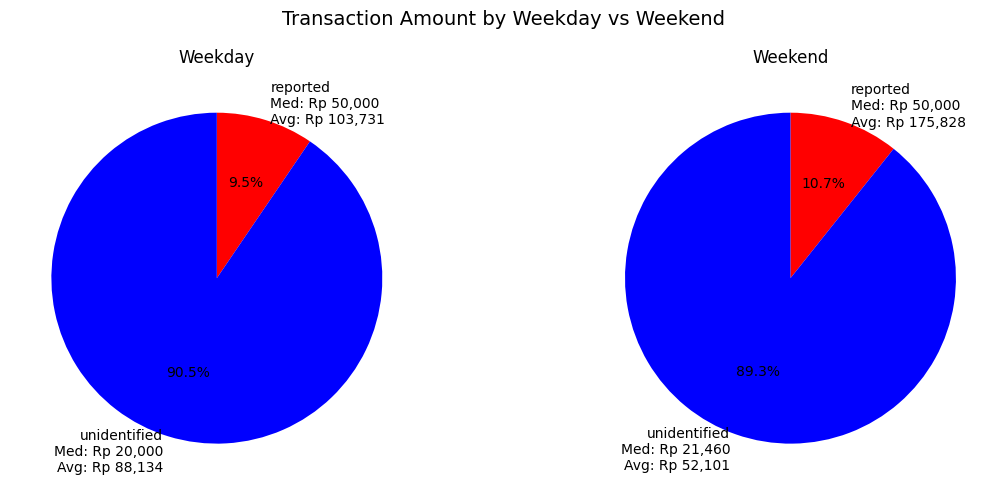

In [57]:
colors = {'reported': 'red', 'clean': 'skyblue', 'unidentified': 'blue'}
labels_order = ['clean', 'reported', 'unidentified']
labels_map = {0: 'Weekday', 1: 'Weekend'}

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

for val in [0, 1]:
    s = eda[eda['is_weekend'] == val]
    counts = s['label'].value_counts()
    med = s.groupby('label')['trans_amount'].median()
    mean = s.groupby('label')['trans_amount'].mean()

    sizes, pie_labels, pie_colors = [], [], []

    for lbl in labels_order:
        if lbl in counts:
            sizes.append(counts[lbl])
            pie_colors.append(colors[lbl])
            pie_labels.append(f"{lbl}\nMed: Rp {med[lbl]:,.0f}\nAvg: Rp {mean[lbl]:,.0f}")

    ax[val].pie(sizes, labels=pie_labels, autopct='%1.1f%%',
                colors=pie_colors, startangle=90, counterclock=False)
    ax[val].set_title(labels_map[val])

plt.suptitle("Transaction Amount by Weekday vs Weekend", fontsize=14)
plt.tight_layout()
plt.show()


- Reported transactions spike in value on weekends: While the median stays flat at Rp 50,000, the average jumps from Rp 103K (weekdays) to Rp 175K (weekends), signaling higher-value reported activity during weekends.
- Reported share increases on weekends: The proportion of reported transactions rises slightly from 9.5% to 10.7%, suggesting a weekend uptick in flagged or potentially fraudulent activity.

#### **Transaction Amount by `Is Night`**

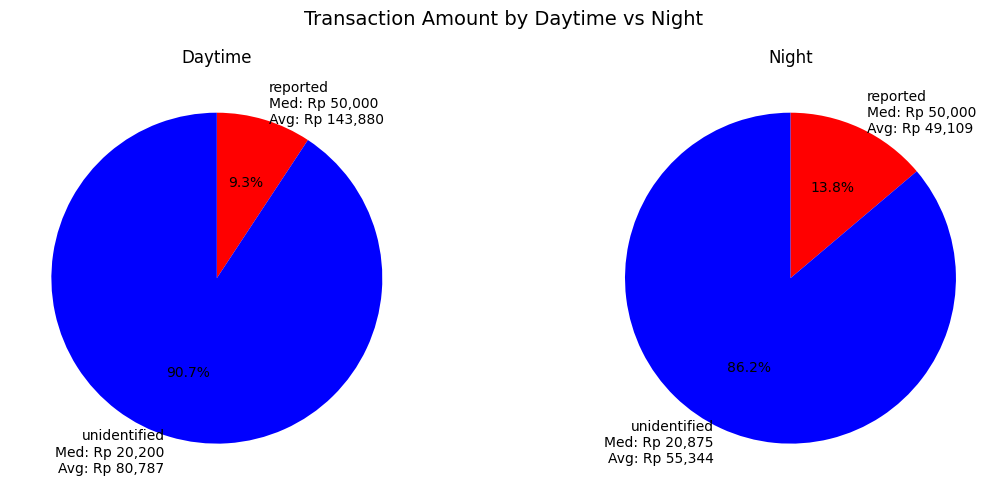

In [58]:
colors = {'reported': 'red', 'clean': 'skyblue', 'unidentified': 'blue'}
labels_order = ['clean', 'reported', 'unidentified']
labels_map = {0: 'Daytime', 1: 'Night'}

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

for val in [0, 1]:
    s = eda[eda['is_night'] == val]
    counts = s['label'].value_counts()
    med = s.groupby('label')['trans_amount'].median()
    mean = s.groupby('label')['trans_amount'].mean()

    sizes, pie_labels, pie_colors = [], [], []

    for lbl in labels_order:
        if lbl in counts:
            sizes.append(counts[lbl])
            pie_colors.append(colors[lbl])
            pie_labels.append(f"{lbl}\nMed: Rp {med[lbl]:,.0f}\nAvg: Rp {mean[lbl]:,.0f}")

    ax[val].pie(sizes, labels=pie_labels, autopct='%1.1f%%',
                colors=pie_colors, startangle=90, counterclock=False)
    ax[val].set_title(labels_map[val])

plt.suptitle("Transaction Amount by Daytime vs Night", fontsize=14)
plt.tight_layout()
plt.show()


- More reported transactions at night: Reported share jumps from 9.3% (day) to 13.8% (night), indicating flagged activity is more frequent after dark.
- Daytime reported transactions are bigger: Median stays flat at Rp 50K, but average drops hard from Rp 143K (day) to Rp 49K (night) — showing high-value reported activity happens mostly during the day.

#### **Investigating High-Risk Transaction Reasons**

In [59]:
pd.crosstab(eda['label'], eda['reason_type'])

reason_type,10002151.0,10002168.0,10002187.0,10002190.0,10002194.0,10002206.0,10002281.0,10002319.0,10002494.0,10002604.0,10002606.0,10002608.0,10002667.0,10002771.0,10002829.0,10002858.0,10002860.0,10003138.0,10003140.0,10003141.0,10003367.0,10003388.0,10003438.0,10003465.0,10003468.0,10003470.0,10003471.0,10003478.0,10003488.0,10003550.0,10003561.0,10003563.0,10003565.0,10003567.0,10003629.0,10003695.0,10003703.0,10003713.0,10003715.0,10003722.0,10003723.0,10003736.0,10003742.0,10003749.0,10003751.0,10003763.0,10003777.0,10003782.0,10003792.0,10003803.0,10003806.0,10003809.0,10003810.0,10003830.0,10003831.0
label,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
reported,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,7,0,0,1,3,0,79,0,2,0,0,0,0,0
unidentified,2,1,33,1,5,2,1,11,1,30,3,2,23,4,4,2,1,17,6,1,18,8,172,45,4,1,1,1,6,1,2,3,1,1,79,2,9,64,1,1,1,15,6,3,7,10,41,179,1,3,11,1,3,6,2


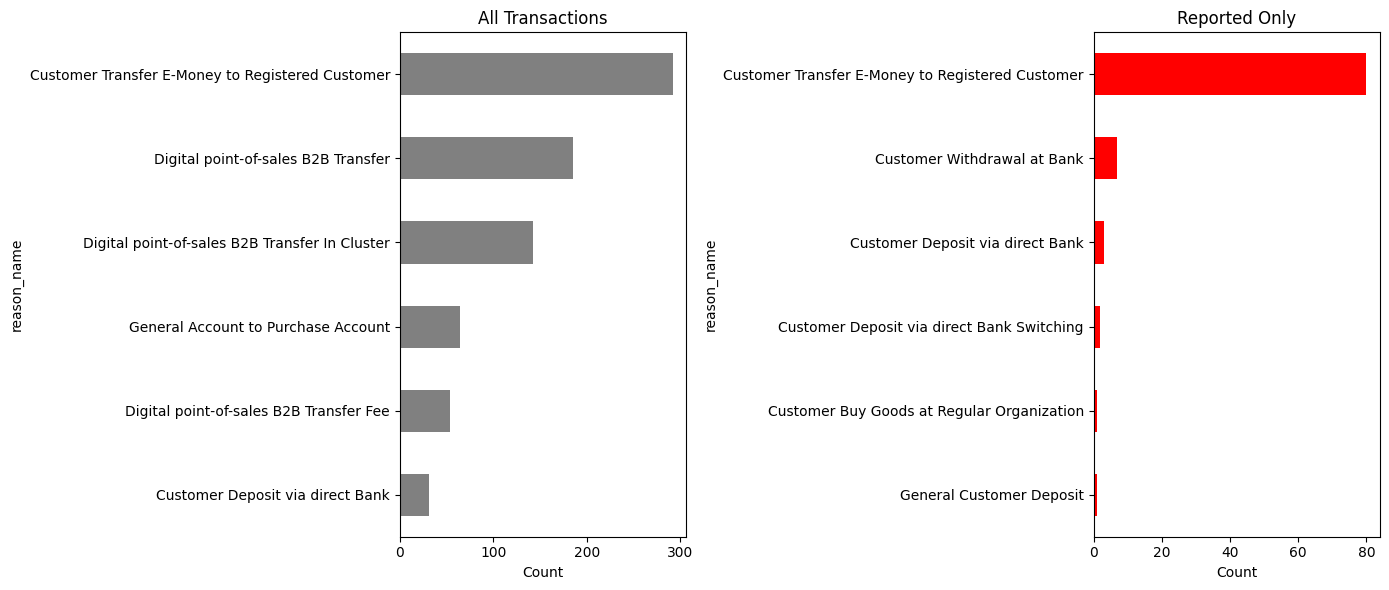

In [60]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Overall
top6 = eda['reason_name'].value_counts().head(6).index
eda[eda['reason_name'].isin(top6)]['reason_name'].value_counts().sort_values().plot.barh(
    ax=ax[0], color='gray')
ax[0].set_title("All Transactions")
ax[0].set_xlabel("Count")

# Reported only
eda[eda['label'] == 'reported']['reason_name'].value_counts().sort_values().plot.barh(
    ax=ax[1], color='red')
ax[1].set_title("Reported Only")
ax[1].set_xlabel("Count")

plt.tight_layout()
plt.show()


In [61]:
subset = eda.copy()
table = pd.DataFrame({
    'mean_all': subset.groupby('reason_name')['trans_amount'].mean().round(0).astype(int),
    'mean_reported': subset[subset['label'] == 'reported'].groupby('reason_name')['trans_amount'].mean().round(0).astype(int),
    'median_all': subset.groupby('reason_name')['trans_amount'].median().round(0).astype(int),
    'median_reported': subset[subset['label'] == 'reported'].groupby('reason_name')['trans_amount'].median().round(0).astype(int),
})

# Sort by mean_reported descending
table = table.sort_values(by='mean_reported', ascending=False)

table.head(10) 


,mean_all,mean_reported,median_all,median_reported
reason_name,,,,
Customer Withdrawal at Bank,739757,954808.0,489500,500000.0
Customer Deposit via direct Bank,420632,83333.0,120000,50000.0
Customer Deposit via direct Bank Switching,59556,72500.0,45000,72500.0
Customer Transfer E-Money to Registered Customer,72440,60018.0,50000,50000.0
General Customer Deposit,55000,20000.0,50000,20000.0
Customer Buy Goods at Regular Organization,22562,13500.0,13500,13500.0
Agent Deposit at Sales Force via API,950000,NaN,500000,NaN
Agent Deposit at Sales Force via API Cross Hierarchy,26625,NaN,3000,NaN
C2B(General) Direct Debit Transaction,30000,NaN,30000,NaN


- "Customer Transfer E-Money to Registered Customer" dominates reported fraud. It's the main channel for suspicious activity
- Fraudulent transactions showed high-value, depending on the type:
    - Fraudulent withdrawals average nearly Rp 955K, median Rp 500K : this is consistent, not random noise.
    - Fraudulent direct deposits also show inflated means (Rp 83K vs Rp 50K median) : clear sign of structured, high-value fraud.
    - Meanwhile, fraud in transfers is more normalized (mean Rp 60K, median Rp 50K), suggesting volume-based fraud, not large-value spikes.

#### **Transaction Count per Hour by Label**

In [62]:
# Group transactions by hour and label
hour_label_count = eda.groupby(['trans_hour', 'label']).size().unstack(fill_value=0)

In [63]:
# Sort index to ensure hours are in order
hour_label_count = hour_label_count.sort_index()

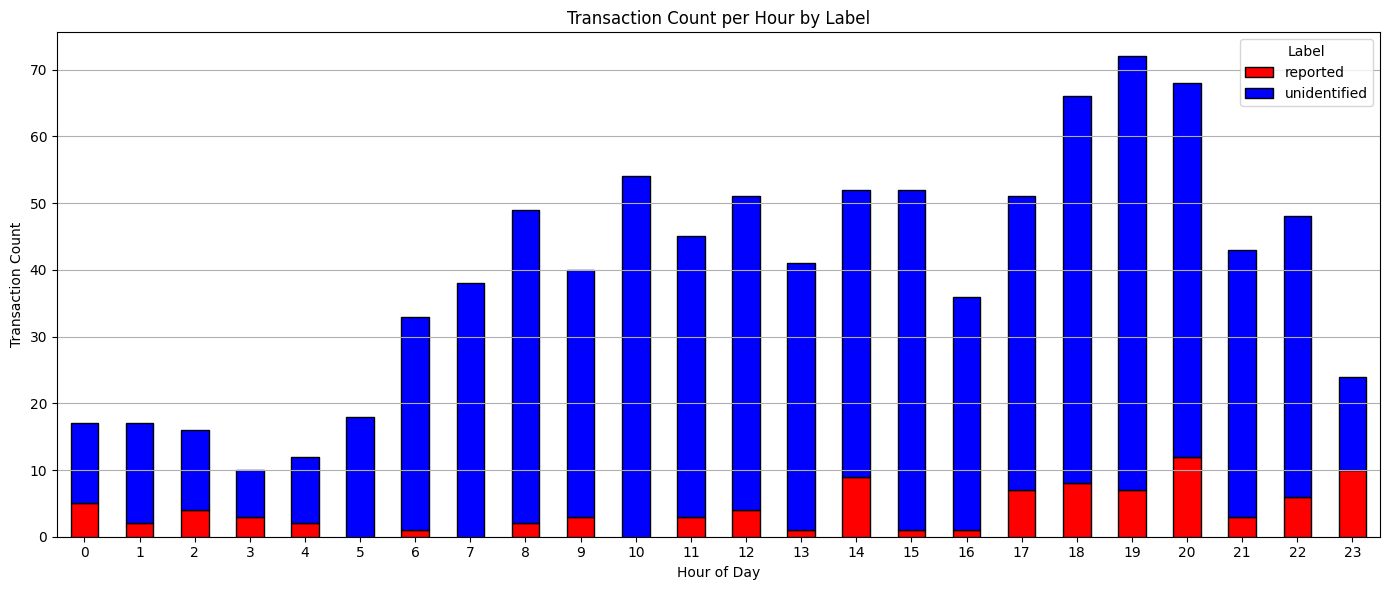

In [64]:
# Plot stacked bar chart
hour_label_count.plot(
    kind='bar',
    stacked=True,
    figsize=(14, 6),
    color={'clean': 'skyblue', 'reported': 'red', 'unidentified': 'blue'}, 
    edgecolor='black'
)

plt.title("Transaction Count per Hour by Label")
plt.xlabel("Hour of Day")
plt.ylabel("Transaction Count")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.legend(title='Label')
plt.show()

- Transactions peak in the evening, especially between 18:00 and 21:00, where reported fraud activity is also at its highest.
- Although unidentified transactions dominate across all hours, the proportion of reported fraud spikes significantly after 17:00, indicating that fraudulent or gambling-related activity intensifies during nighttime. 
- This pattern aligns with typical user behavior on online gambling platforms, where engagement is higher in the evening.

#### **Transactions per Year by Label**

In [65]:
year_label_count = eda.groupby(['trans_year', 'label']).size().unstack(fill_value=0).sort_index()


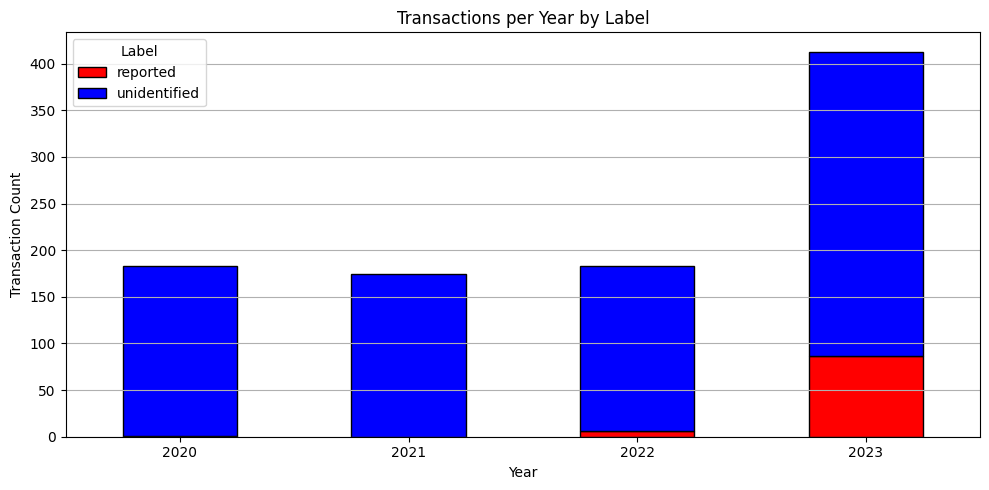

In [66]:
year_label_count.plot(
    kind='bar',
    stacked=True,
    figsize=(10, 5),
    color={'clean': 'skyblue', 'reported': 'red', 'unidentified': 'blue'},
    edgecolor='black'
)
plt.title("Transactions per Year by Label")
plt.xlabel("Year")
plt.ylabel("Transaction Count")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.legend(title='Label')
plt.show()



- From 2020 to 2023, total transactions grew sharply, with a significant spike in reported fraud in 2023, the first year it became a major portion.
- This jump aligns with our main issue: a surge in online gambling via e-wallets, driven by stricter regulations requiring providers to detect and report suspicious activity.

#### **Transactions per Month by Label**

In [67]:
month_label_count = eda.groupby(['trans_month', 'label']).size().unstack(fill_value=0).sort_index()


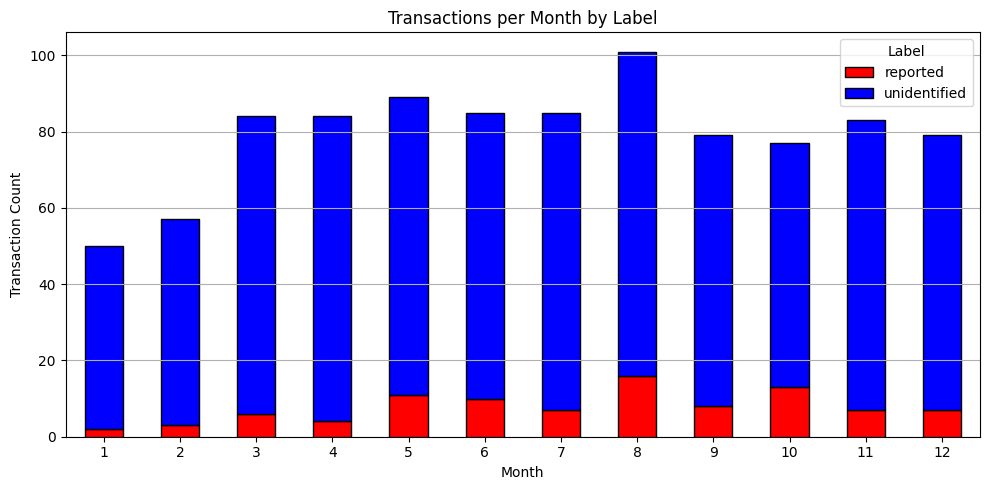

In [68]:
month_label_count.plot(
    kind='bar',
    stacked=True,
    figsize=(10, 5),
    color={'clean': 'skyblue', 'reported': 'red', 'unidentified': 'blue'},
    edgecolor='black'
)
plt.title("Transactions per Month by Label")
plt.xlabel("Month")
plt.ylabel("Transaction Count")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.legend(title='Label')
plt.show()


- The highest number of reported fraud cases occurs in August, which also marks the overall peak in total transactions which signaling a concentrated surge in suspicious activity.
- May, August, and October to December all show notably elevated volumes of reported transactions, suggesting a seasonal or campaign-based pattern in fraudulent behavior.
- These months represent heightened risk periods, where monitoring and enforcement should be intensified, especially in August.
- Reported fraud isn’t random, it clusters. Track and act more aggressively in peak fraud months like August, May, and Q4.

#### **Transactions per Day of Month by Label**

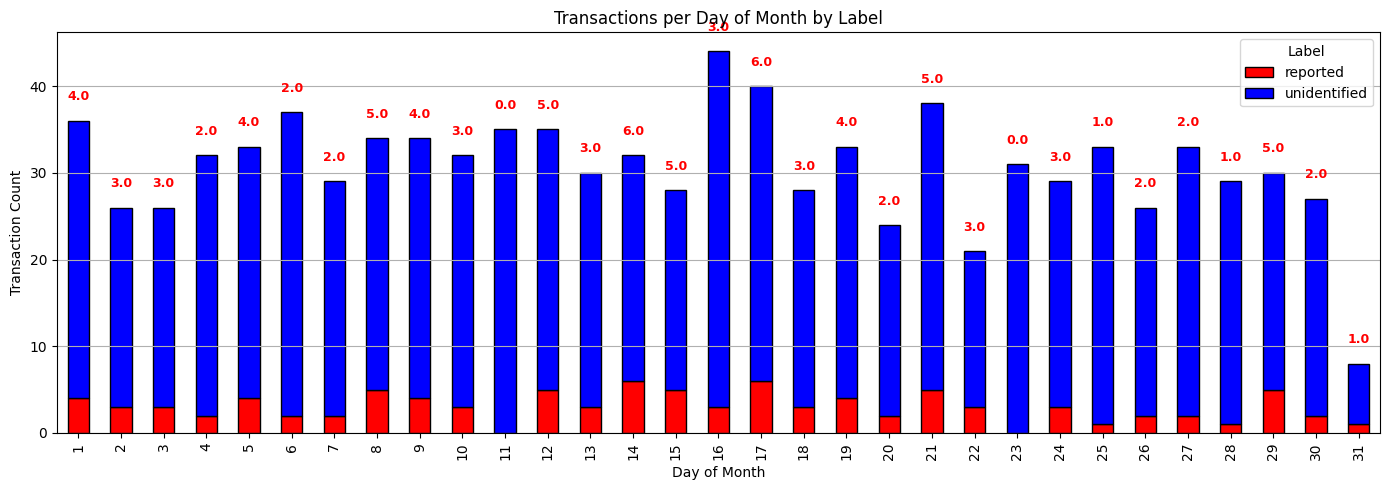

In [69]:
import matplotlib.pyplot as plt
import numpy as np

# Hitung jumlah transaksi per hari dan label
day_label_count = eda.groupby(['trans_day', 'label']).size().unstack(fill_value=0).sort_index()

# Plot stacked bar
ax = day_label_count.plot(
    kind='bar',
    stacked=True,
    figsize=(14, 5),
    color={'clean': 'skyblue', 'reported': 'red', 'unidentified': 'blue'},
    edgecolor='black'
)

plt.title("Transactions per Day of Month by Label")
plt.xlabel("Day of Month")
plt.ylabel("Transaction Count")
plt.xticks(range(0, 31))
plt.grid(axis='y')
plt.tight_layout()
plt.legend(title='Label')

# ➕ Tambahkan persentase reported
for i, day in enumerate(day_label_count.index):
    total = day_label_count.loc[day].sum()
    reported = day_label_count.loc[day].get('reported', 0)
    
    if total > 0:
        # pct = (reported / total) * 100
        pct = reported
        ax.text(i, total + 2, f"{pct:.1f}", ha='center', va='bottom', fontsize=9, fontweight='bold', color='red')

plt.show()


- The highest spikes in reported fraud occur on days 14, 16, and 17, with 6 reported cases each, these are the peak risk days.
- Other elevated days include 5, 12, 15, 21, 28, and 30, each with 5 reported cases, indicating consistent mid-to-late month fraud intensity.
- In contrast, early (days 1–10) and late (days 25–31) parts of the month show generally lower or scattered fraud activity.
- Mid-month (14–17) is the hot zone for reported fraud. Risk scoring and surveillance systems should be more aggressive around these days.

#### **Summary**
- Weekend fraud sees higher value and slightly increased share. Fraud is more frequent at night but larger in value during the day.
- The main fraud channel is E-Money transfers between registered customers, with withdrawals showing especially high-value fraud.
- Fraud activity peaks between 18:00 and 21:00, aligning with online gambling hours. 
- There was a sharp surge in fraud volume in 2023 due to tighter regulations. August and mid-month days (14, 16, 17) represent the highest fraud risk periods.

#### **Recommendation**
1. Intensify fraud monitoring on weekends and peak hours (18:00–21:00) when activity and value spike.
2. Prioritize detection on E-Money transfers between registered users and high-value withdrawals, targeting structured fraud.
3. Strengthen enforcement in August and critical mid-month dates (14, 16, 17) to prevent fraud surges.

## b. Statistical Inference

In [70]:
data.columns

Index(['trans_status', 'trans_initiate_time', 'trans_end_time',
       'debit_party_type', 'credit_party_type', 'trans_amount', 'fee',
       'commission', 'is_reversed', 'reason_type', 'reason_name',
       'transaction_type', 'channel', 'error_message', 'is_sharia', 'label',
       'is_error'],
      dtype='object')

In [71]:
columns=['trans_status', 'trans_initiate_time', 'trans_end_time',
       'debit_party_type', 'credit_party_type', 'trans_amount', 'fee',
       'commission', 'is_reversed', 'reason_type', 'reason_name',
       'transaction_type', 'channel', 'is_sharia', 'label',
       'is_error']

In [72]:
df_stat=data[columns].copy()

##### **Identifying Statistically Significant Categorical Features (Kruskall-Wallis)**

In [73]:
'''Feature Significance Test (Kruskal-Wallis)

**Hypotheses:**
- **H₀ (null)**: No significant difference in the target distribution across feature groups.
- **H₁ (alternative)**: Significant difference exists in the target distribution across feature groups.

**Result:**  
All features have **p-value = 0.0**, which is below the significance level (α = 0.05).  
**Reject H₀** → All features are **statistically significant** in explaining the target.
'''

'Feature Significance Test (Kruskal-Wallis)\n\n**Hypotheses:**\n- **H₀ (null)**: No significant difference in the target distribution across feature groups.\n- **H₁ (alternative)**: Significant difference exists in the target distribution across feature groups.\n\n**Result:**  \nAll features have **p-value = 0.0**, which is below the significance level (α = 0.05).  \n**Reject H₀** → All features are **statistically significant** in explaining the target.\n'

In [74]:
target = 'label'
alpha = 0.05

In [75]:
categorical_cols = df_stat.select_dtypes(include=['object', 'category','bool']).columns

In [76]:
kruskal_results = []

for col in categorical_cols:
    groups = [df_stat[df_stat[col] == level][target].dropna() for level in df_stat[col].dropna().unique()]
    if len(groups) > 1:  # Kruskal perlu ≥2 grup
        stat, p = kruskal(*groups)
        kruskal_results.append({
            'feature': col,
            'p_value': p,
            'H_statistic': stat,
            'significant': p < alpha
        })

In [77]:
kruskal_df = pd.DataFrame(kruskal_results).sort_values('p_value')
kruskal_df

,feature,p_value,H_statistic,significant
10,label,4.875209e-209,952.000000,True
7,transaction_type,2.084039e-31,216.076933,True
4,credit_party_type,2.799359e-31,140.701495,True
3,debit_party_type,2.592681e-23,98.947630,True
6,reason_name,1.291861e-18,179.584628,True
9,is_sharia,2.237086e-17,71.923458,True
8,channel,3.638262e-02,6.627328,True
11,is_error,2.300188e-01,1.440745,False
0,trans_status,4.347556e-01,1.665943,False
1,trans_initiate_time,4.939048e-01,952.000000,False


##### **Identifying Statistically Significant Numerical Features (Spearman)**

In [78]:
''' 
**Hypotheses:**  
- **H₀ (null)**: No monotonic relationship between the feature and the target variable.  
- **H₁ (alternative)**: A monotonic relationship exists between the feature and the target variable.

**Result:**  
All features show **p-value = 0.0**, which is below the significance level (α = 0.05).  
**Reject H₀** → All features are **statistically significant** in their monotonic correlation with the target.
'''

' \n**Hypotheses:**  \n- **H₀ (null)**: No monotonic relationship between the feature and the target variable.  \n- **H₁ (alternative)**: A monotonic relationship exists between the feature and the target variable.\n\n**Result:**  \nAll features show **p-value = 0.0**, which is below the significance level (α = 0.05).  \n**Reject H₀** → All features are **statistically significant** in their monotonic correlation with the target.\n'

In [79]:
import pandas as pd
import numpy as np

# Ensure datetime columns are in proper format
df_stat['trans_initiate_time'] = pd.to_datetime(df_stat['trans_initiate_time'])
df_stat['trans_end_time'] = pd.to_datetime(df_stat['trans_end_time'])

# 1. Transaction duration (in seconds)
df_stat['trans_duration'] = (df_stat['trans_end_time'] - df_stat['trans_initiate_time']).dt.total_seconds()

# 2. Hour of the transaction
df_stat['trans_hour'] = df_stat['trans_initiate_time'].dt.hour

# 3. Day of the week (0 = Monday, 6 = Sunday)
df_stat['trans_weekday'] = df_stat['trans_initiate_time'].dt.weekday

# 4. Is weekend (Saturday or Sunday)
df_stat['is_weekend'] = df_stat['trans_weekday'] >= 5

# 5. Is night time (00:00–06:00)
df_stat['is_night'] = df_stat['trans_hour'].between(0, 6)

In [80]:
df_stat['label'] = df_stat['label'].map({'unidentified': 0, 'reported': 1}).astype(int)

In [81]:
numerical_features = df_stat.select_dtypes(include=['number']).drop(columns=['label']).columns

In [82]:
results = []

for feature in numerical_features:
    corr, p_val = spearmanr(df_stat[feature], df_stat['label'])
    results.append({
        "feature": feature,
        "spearman_corr": corr,
        "p_value": p_val,
        "significant": p_val < 0.05
    })

In [83]:
num_results = pd.DataFrame(results).sort_values(by="p_value")
num_results

,feature,spearman_corr,p_value,significant
3,reason_type,0.350287,6.789367e-29,True
0,trans_amount,0.170689,1.149619e-07,True
1,fee,-0.127390,8.029264e-05,True
4,trans_duration,-0.091251,4.814594e-03,True
5,trans_hour,0.088233,6.419508e-03,True
6,trans_weekday,0.016275,6.158069e-01,False
2,commission,NaN,NaN,False


**Conclusion** 

> Features with significant results from Kruskal-Wallis and Spearman correlation tests were kept for modeling in df_modeling. Non-significant features were dropped to improve model performance.

# **5. Modelling**

In [84]:
columns = [
    'transaction_type',
    'credit_party_type',
    'debit_party_type',
    'is_sharia',
    'channel',
    'reason_name',
    'trans_amount',
    'fee',
    'label'
]

In [85]:
df_model = data[columns].copy()

In [86]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 953 entries, 0 to 999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   transaction_type   953 non-null    object 
 1   credit_party_type  953 non-null    object 
 2   debit_party_type   953 non-null    object 
 3   is_sharia          953 non-null    bool   
 4   channel            953 non-null    object 
 5   reason_name        953 non-null    object 
 6   trans_amount       953 non-null    int64  
 7   fee                953 non-null    float64
 8   label              953 non-null    object 
dtypes: bool(1), float64(1), int64(1), object(6)
memory usage: 67.9+ KB


In [87]:
df_model['is_sharia'] = df_model['is_sharia'].astype('object')

In [88]:
df_model.head()

,transaction_type,credit_party_type,debit_party_type,is_sharia,channel,reason_name,trans_amount,fee,label
0,Business to Business Transfer,merchant,merchant,False,API,Digital point-of-sales B2B Transfer,920,0.0,unidentified
1,Customer Buy Goods,merchant,customer,False,API,Customer Top Up Electronic Money Chip Based by...,50000,1500.0,unidentified
2,Customer Withdrawal,customer,customer,True,API,Customer Transfer E-Money to Registered Customer,19000,0.0,reported
3,Business to Business Transfer,merchant,merchant,False,API,Digital point-of-sales B2B Transfer,20200,0.0,unidentified
4,Customer Withdrawal,customer,customer,False,API,Customer Transfer E-Money to Registered Customer,40000,0.0,unidentified


### **Feature Transformation**

In [89]:
df_model.describe().T

,count,mean,std,min,25%,50%,75%,max
trans_amount,953.0,82489.338930,278262.322110,1.0,10000.0,23350.0,50000.0,5000000.0
fee,953.0,102.479759,363.512987,0.0,0.0,0.0,20.0,3100.0


- Only transaction_amount needs log transform before scaling due to skew and outliers.

In [90]:
df_model['label'].value_counts(normalize=True) * 100

label
unidentified    90.136411
reported         9.863589
Name: proportion, dtype: float64

### **Modelling**

**Framework Overview: Positive-Unlabeled Learning with Pconf for Fraud Detection**

We designed a hybrid fraud detection framework that combines **supervised learning**, **semi-supervised PU learning**, and **Positive Confidence (Pconf) learning**, tailored for real-world scenarios where only partial ground truth is available.

1. Label Structure
    - `reported` transactions are treated as **confirmed fraud** (positive class, label = 1).
    - `unidentified` transactions are **unlabeled**, containing a mix of fraud and non-fraud (label unknown).
    - No true negatives are available in the dataset.

2. Preprocessing
    - Apply `log1p` transformation to skewed numeric features (`trans_amount`, `fee`).
    - Apply one-hot encoding to categorical features (`transaction_type`, `credit_party_type`, `channel`, etc.).
    - Use `ColumnTransformer` to combine transformations into a single pipeline.

3. PU Learning Setup
    - Split data into **positives** (`reported`) and **unlabeled** (`unidentified`).
    - Train an **Isolation Forest** on positives to detect **high-confidence frauds** (i.e., those not classified as outliers).
    - Extract confident fraud samples for next steps.

4. Pconf Learning
    - Use high-confidence positives and their anomaly scores to train an **AdaBoost Regressor**.
    - This regressor learns to predict **fraud confidence** based on features.
    - Predict fraud confidence scores for all unlabeled transactions.
    - Define a threshold (e.g., 90th percentile of positive confidence) to split:
    - **Pseudo-positives**: unlabeled transactions with high confidence of being fraud.
    - **Pseudo-negatives**: remaining unlabeled transactions.

5. Final Dataset Construction
    - Combine:
    - High-confidence positives (`reported`)
    - Pseudo-positives (from `unidentified`)
    - Pseudo-negatives (from `unidentified`)
    - Assign binary labels:
    - `1` → for both confirmed and pseudo-positives.
    - `0` → for pseudo-negatives.
    - Train final supervised models using this expanded labeled dataset.

6. Why This Framework Works
    - Effective with limited ground truth: Maximizes use of known frauds.
    - Recovers hidden fraud in unlabeled data using statistical and confidence-based methods.
    - Avoids false assumptions about unlabeled data being clean or non-fraud.
    - Grounded in theory: Based on PU learning and Pconf literature (e.g., Elkan & Noto 2008; Ishida et al., 2018).



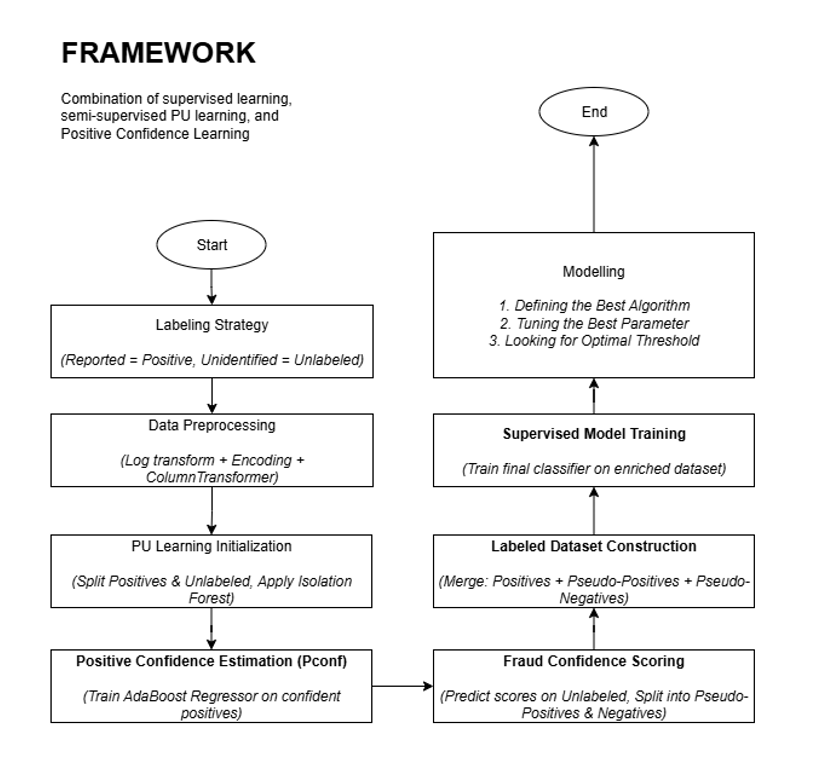

In [152]:
# ====================================
# === STEP 1: Preprocessing Setup ====
# ====================================
log1p_cols = ['trans_amount', 'fee']
nominal_cat = ['is_sharia']
multi_cat = ['transaction_type', 'credit_party_type', 'debit_party_type', 'channel', 'reason_name']

log_pipeline = Pipeline([
    ('log1p', FunctionTransformer(np.log1p, feature_names_out='one-to-one')),
])

nominal_pipeline = Pipeline([
    ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)),
])

multi_pipeline = Pipeline([
    ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)),
])

preprocessor = ColumnTransformer([
    ('log_num', log_pipeline, log1p_cols),
    ('nom_cat', nominal_pipeline, nominal_cat),
    ('multi_cat', multi_pipeline, multi_cat),
])

In [153]:
# ====================================
# === STEP 2: PU Labeling ============
# ====================================
reported = df_model[df_model['label'] == 'reported'].copy()
unidentified = df_model[df_model['label'] == 'unidentified'].copy()

reported['target'] = 1
unidentified['target'] = 0

df_pu = pd.concat([reported, unidentified])
X_raw = df_pu.drop(columns=['label', 'target'])
y = df_pu['target']

X_transformed = preprocessor.fit_transform(X_raw)

In [154]:
# ====================================
# === STEP 3: Isolation Forest =======
# ====================================
isof = IsolationForest(contamination='auto', random_state=42)
isof.fit(X_transformed[y == 1])  # Only positives

scores = -isof.decision_function(X_transformed)
confidence_scores = scores[y == 1]
X_confident = X_transformed[y == 1]

In [155]:
# ====================================
# === STEP 4: Pconf Learning =========
# ====================================
X_train_p, X_val_p, conf_train, conf_val = train_test_split(
    X_confident, confidence_scores, test_size=0.2, random_state=42
)

pconf_model = AdaBoostRegressor(n_estimators=100, random_state=42)
pconf_model.fit(X_train_p, conf_train)

X_unlabeled = X_transformed[y == 0]
pseudo_confidence = pconf_model.predict(X_unlabeled)

threshold = np.percentile(conf_train, 90)
pseudo_positive_mask = pseudo_confidence > threshold

X_pseudo_pos = X_unlabeled[pseudo_positive_mask]
X_pseudo_neg = X_unlabeled[~pseudo_positive_mask]

In [156]:
# ====================================
# === STEP 5: Final Dataset ==========
# ====================================
X_final = np.vstack([X_confident, X_pseudo_pos, X_pseudo_neg])
y_final = np.hstack([
    np.ones(len(X_confident)),
    np.ones(len(X_pseudo_pos)),
    np.zeros(len(X_pseudo_neg)),
])

X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.2, random_state=42, stratify=y_final)

In [161]:
# ====================================
# === STEP 6: Multi-Model Loop =======
# ====================================

models = {
    'LGBM': LGBMClassifier(random_state=42),
    'XGB': XGBClassifier(random_state=42),
    'CatBoost': CatBoostClassifier(random_state=42),
    'RF': RandomForestClassifier(random_state=42),
    'HistGB': HistGradientBoostingClassifier(random_state=42),
    'GBC': GradientBoostingClassifier(random_state=42),
    'Bagging': BaggingClassifier(random_state=42),
    'LogReg': LogisticRegression(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42)
}

In [162]:
results = []

for name, model in models.items():
    try:
        model.fit(X_train, y_train)

        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        train_f1 = f1_score(y_train, y_train_pred)
        test_f1 = f1_score(y_test, y_test_pred)
        
        train_f2 = fbeta_score(y_train, y_train_pred, beta=2)
        test_f2 = fbeta_score(y_test, y_test_pred, beta=2)

        train_recall = recall_score(y_train, y_train_pred)
        test_recall = recall_score(y_test, y_test_pred)

        train_prec = precision_score(y_train, y_train_pred)
        test_prec = precision_score(y_test, y_test_pred)

        train_acc = accuracy_score(y_train, y_train_pred)
        test_acc = accuracy_score(y_test, y_test_pred)

        results.append({
            'Model': name,
            'Train_F1': train_f1,
            'Test_F1': test_f1,
            'Train_F2': train_f2,
            'Test_F2': test_f2,
            'Train_Recall': train_recall,
            'Test_Recall': test_recall,
            'Train_Precision': train_prec,
            'Test_Precision': test_prec,
            'Train_Acc': train_acc,
            'Test_Acc': test_acc
        })

    except Exception as e:
        print(f"{name} failed: {e}")

[LightGBM] [Info] Number of positive: 612, number of negative: 150
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000353 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 295
[LightGBM] [Info] Number of data points in the train set: 762, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.803150 -> initscore=1.406097
[LightGBM] [Info] Start training from score 1.406097
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

In [165]:
results_df = pd.DataFrame(results)
results_df.sort_values(by='Test_F2', ascending=False).reset_index(drop=True)

,Model,Train_F1,Test_F1,Train_F2,Test_F2,Train_Recall,Test_Recall,Train_Precision,Test_Precision,Train_Acc,Test_Acc
0,LogReg,0.933105,0.966443,0.906063,0.951123,0.888889,0.941176,0.981949,0.993103,0.897638,0.947644
1,AdaBoost,0.933563,0.966443,0.903172,0.951123,0.883987,0.941176,0.989031,0.993103,0.898950,0.947644
2,HistGB,0.948783,0.950820,0.933267,0.948953,0.923203,0.947712,0.975820,0.953947,0.919948,0.921466
3,CatBoost,0.952300,0.953642,0.928571,0.946124,0.913399,0.941176,0.994662,0.966443,0.926509,0.926702
4,LGBM,0.958439,0.947368,0.936982,0.943644,0.923203,0.941176,0.996473,0.953642,0.935696,0.916230
5,GBC,0.956816,0.947368,0.936361,0.943644,0.923203,0.941176,0.992970,0.953642,0.933071,0.916230
6,XGB,0.958650,0.944262,0.940086,0.942408,0.928105,0.941176,0.991274,0.947368,0.935696,0.910995
7,RF,0.965517,0.944262,0.948760,0.942408,0.937908,0.941176,0.994801,0.947368,0.946194,0.910995
8,Bagging,0.965459,0.947020,0.947734,0.939553,0.936275,0.934641,0.996522,0.959732,0.946194,0.916230


- AdaBoost outperforms other models by effectively capturing complex, nonlinear patterns and interactions in the data.
- It delivers consistently high F1 and F2 scores on both training and test sets, ensuring robust performance and better generalization.
- Given these strengths, AdaBoost is the clear choice to move forward with for this task.

### **Adaboost Algorithm**

In [204]:
from sklearn.ensemble import AdaBoostClassifier

ada_model = AdaBoostClassifier(random_state=42)
ada_model.fit(X_train, y_train)


,estimator,None
,n_estimators,100
,learning_rate,1
,algorithm,'deprecated'
,random_state,42


In [197]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [198]:
y_pred = ada_model.predict(X_test)

In [199]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

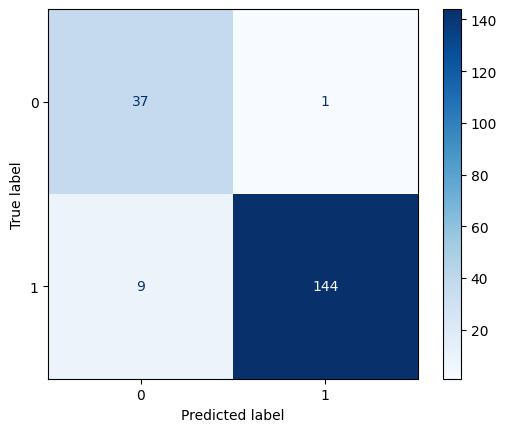

In [200]:
# Visualization
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')

In [202]:
# Classification Report (Precision, Recall, F1-score, Support)
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, digits=4))


Classification Report:

              precision    recall  f1-score   support

         0.0     0.8043    0.9737    0.8810        38
         1.0     0.9931    0.9412    0.9664       153

    accuracy                         0.9476       191
   macro avg     0.8987    0.9574    0.9237       191
weighted avg     0.9555    0.9476    0.9494       191



### **Hyperparameter Tuning Adaboost Algorithm**

In [ ]:
# 1. Base estimator
adaboost = AdaBoostClassifier(random_state=42)

In [ ]:
# 2. Parameter grid
param_grid = {
    'n_estimators': [50, 100],
    'learning_rate': [1.0]
}

In [334]:
# 4. Grid search with F2 score
grid = GridSearchCV(
    estimator=adaboost,
    param_grid=param_grid,
    scoring=f2_scorer,
    cv=5,
    n_jobs=1, 
    verbose=1
)

In [335]:
# 3. F2 scorer
f2_scorer = make_scorer(fbeta_score, beta=2)

In [336]:
# 5. Fit grid search
grid.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


,estimator,AdaBoostClass...ndom_state=42)
,param_grid,"{'learning_rate': [1.0], 'n_estimators': [50]}"
,scoring,"make_scorer(f...dict', beta=2)"
,n_jobs,1
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,estimator,None


In [337]:
# 6. Best model evaluation
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)

In [338]:
print("Best Params:", grid.best_params_)
print(classification_report(y_test, y_pred, digits=4))

Best Params: {'learning_rate': 1.0, 'n_estimators': 50}
              precision    recall  f1-score   support

         0.0     0.8043    0.9737    0.8810        38
         1.0     0.9931    0.9412    0.9664       153

    accuracy                         0.9476       191
   macro avg     0.8987    0.9574    0.9237       191
weighted avg     0.9555    0.9476    0.9494       191



- AdaBoost (learning_rate=1.0, n_estimators=50) outperforms other models based on the F2 score, which prioritizes recall (a key factor in minimizing undetected fraud).
- It achieves high recall (~94%) with strong overall performance, making it a robust choice under class imbalance.

### **PR Curve**

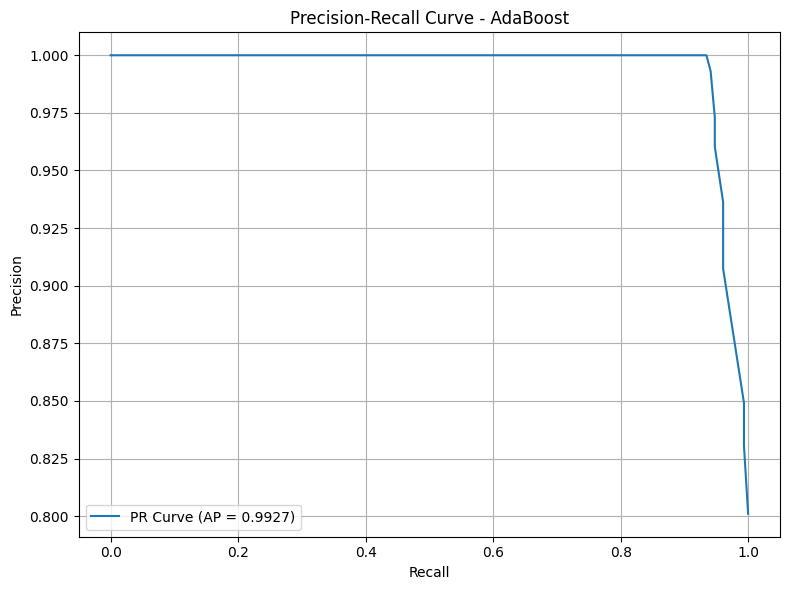

In [339]:
# PR Curve components
precision, recall, pr_thresholds = precision_recall_curve(y_test, y_proba)
ap_score = average_precision_score(y_test, y_proba)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'PR Curve (AP = {ap_score:.4f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - AdaBoost')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


- A PR Curve Average Precision (AP) of 99.27% means the model is extremely effective at ranking fraud cases above non-fraud ones. 
- It consistently maintains high precision even as recall increases, making it excellent for prioritizing suspicious transactions. 
- However, while AP reflects strong overall ranking performance, it doesn't guarantee the default threshold (0.5) is optimal
- We still need to tune it based on business needs like minimizing false positives or avoiding missed fraud.

### **Defining Threshold**

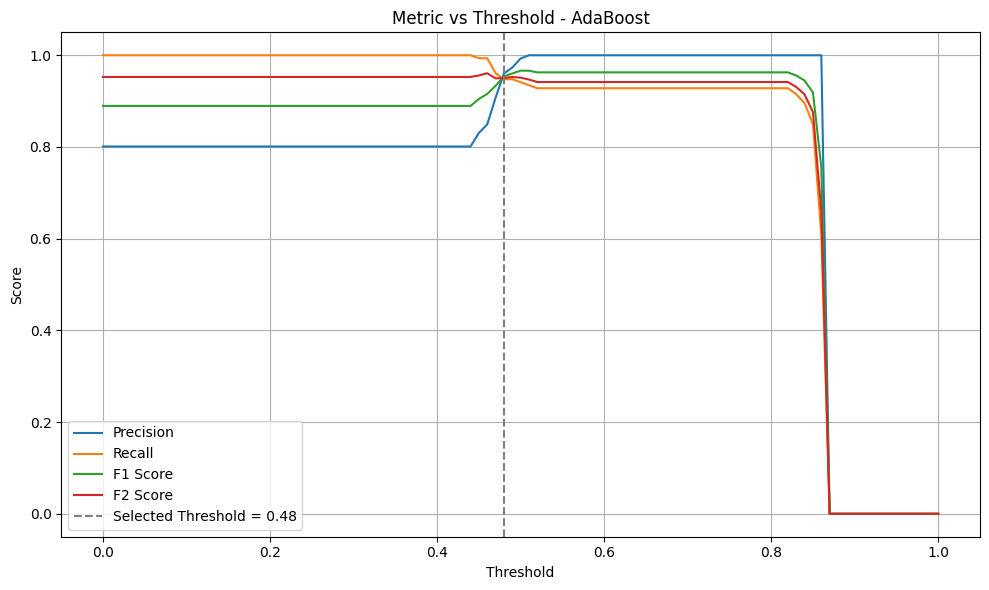

In [340]:
thresholds = np.arange(0.0, 1.01, 0.01)
precisions = []
recalls = []
f1s = []
f2s = []

for t in thresholds:
    y_pred_t = (y_proba > t).astype(int)
    precisions.append(precision_score(y_test, y_pred_t))
    recalls.append(recall_score(y_test, y_pred_t))
    f1s.append(f1_score(y_test, y_pred_t))
    f2s.append(fbeta_score(y_test, y_pred_t, beta=2))  # recall-focused

# Plot
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precisions, label='Precision')
plt.plot(thresholds, recalls, label='Recall')
plt.plot(thresholds, f1s, label='F1 Score')
plt.plot(thresholds, f2s, label='F2 Score')
plt.axvline(x=threshold, color='gray', linestyle='--', label=f'Selected Threshold = {threshold}')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Metric vs Threshold - AdaBoost')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [345]:
# Train AdaBoost
ada_model = AdaBoostClassifier(learning_rate= 1, n_estimators= 50, random_state=42)
ada_model.fit(X_train, y_train)

,estimator,None
,n_estimators,50
,learning_rate,1
,algorithm,'deprecated'
,random_state,42


In [346]:
# Predict probability
y_proba = ada_model.predict_proba(X_test)[:, 1]

In [347]:
# Custom threshold
threshold = 0.48
y_pred_custom = (y_proba > threshold).astype(int)

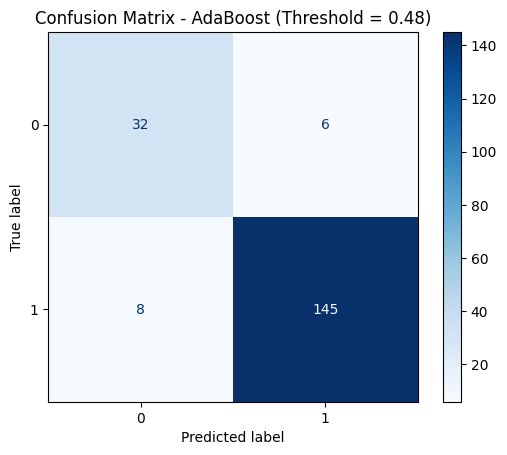


Classification Report (Threshold = 0.48):

              precision    recall  f1-score   support

         0.0     0.8000    0.8421    0.8205        38
         1.0     0.9603    0.9477    0.9539       153

    accuracy                         0.9267       191
   macro avg     0.8801    0.8949    0.8872       191
weighted avg     0.9284    0.9267    0.9274       191



In [348]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_custom)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title(f"Confusion Matrix - AdaBoost (Threshold = {threshold})")
plt.show()

# Classification Report
print("\nClassification Report (Threshold = {:.2f}):\n".format(threshold))
print(classification_report(y_test, y_pred_custom, digits=4))


In [349]:
from sklearn.metrics import fbeta_score

f2 = fbeta_score(y_test, y_pred_custom, beta=2)
print(f"F2-score (fraud class, beta=2): {f2:.4f}")

F2-score (fraud class, beta=2): 0.9502


Threshold 0.48 is optimal, balancing high precision and recall with stable F1/F2 scores—ideal for fraud detection deployment.

### **Interpretable & Explanable AI**

#### **Tree Plot**

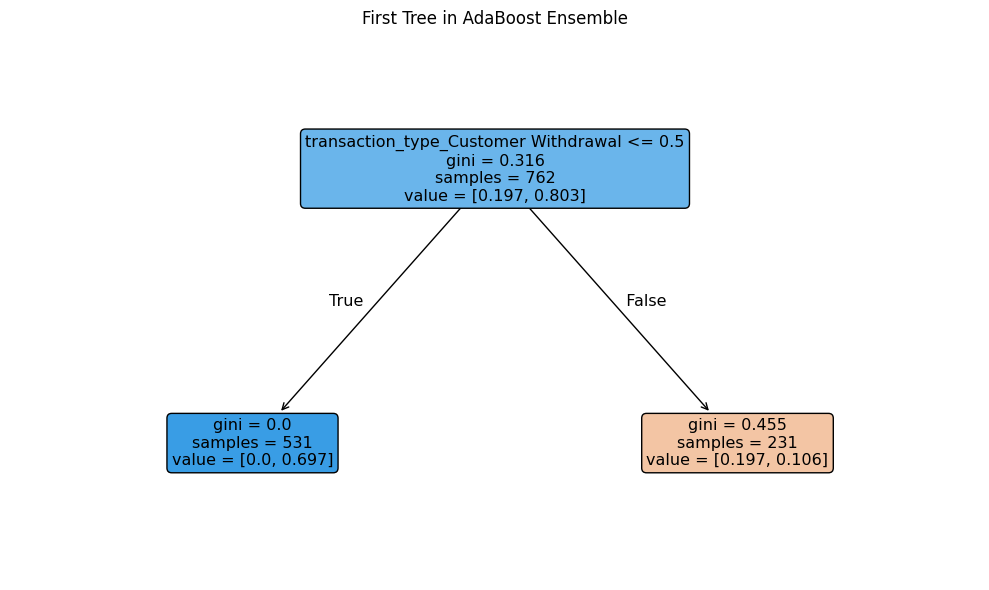

In [233]:
# Plot the first tree
plt.figure(figsize=(10, 6))
plot_tree(ada_model.estimators_[0], feature_names=X_train.columns, filled=True, rounded=True)
plt.title("First Tree in AdaBoost Ensemble")
plt.tight_layout()
plt.show()

- The first decision tree splits solely on the feature transaction_type_Customer Withdrawal, separating transactions based on whether they are customer withdrawals or not. 
    - If not (≤ 0.5), the model directly classifies as fraud
    - If yes (> 0.5), further evaluation continues.
- This indicates that AdaBoost relies heavily on this feature right from the first tree, suggesting that the transaction type is a strong signal for distinguishing between fraud and non-fraud.

In [230]:
print(f"Number of trees in AdaBoost: {len(adaboost.estimators_)}")

Number of trees in AdaBoost: 100


#### **Feature Importance**

In [217]:
def get_feature_names(preprocessor):
    feature_names = []

    for name, transformer, cols in preprocessor.transformers_:
        if name == 'remainder':
            continue
        if hasattr(transformer, 'get_feature_names_out'):
            names = transformer.get_feature_names_out(cols)
        else:
            names = cols  # for simple passthroughs
        feature_names.extend(names)

    return feature_names

# fit transformernya dulu
preprocessor.fit(X_raw)

# ambil nama fiturnya
feature_names = get_feature_names(preprocessor)


In [222]:
# === Feature Importance ===
importances = ada_model.feature_importances_

In [ ]:
feat_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

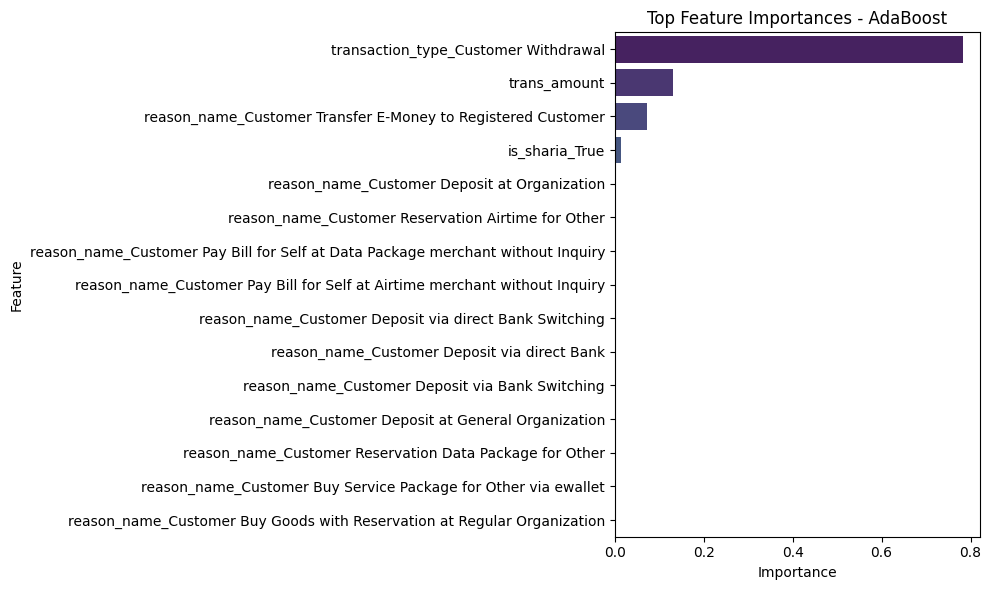

In [218]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_df.head(15), palette='viridis')
plt.title("Top Feature Importances - AdaBoost")
plt.tight_layout()
plt.show()


Customer Withdrawal dominates (~80%), followed by transaction amount and E-Money transfers — key fraud signals in the model.

#### **SHAP**

In [220]:
# SHAP model-agnostic
explainer = shap.Explainer(ada_model.predict_proba, X_train, feature_names=feature_names)
shap_values = explainer(X_test) 

PermutationExplainer explainer: 192it [01:03,  2.51it/s]                         


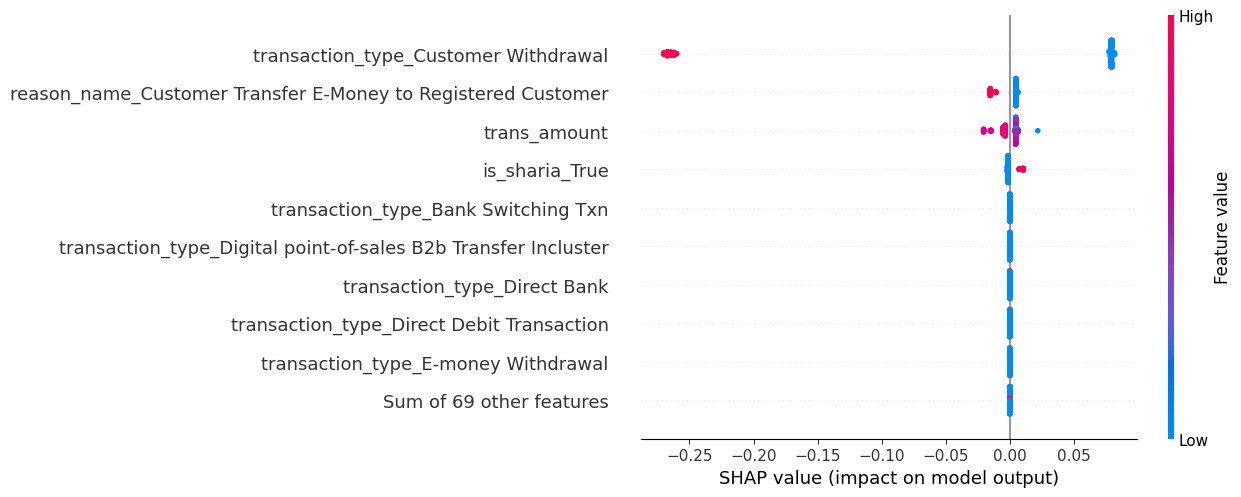

In [221]:
# Shap values for class 1 (fraud)
shap_values_class1 = shap_values[:, :, 1]
shap.plots.beeswarm(shap_values_class1)

Top Features Driving Fraud Prediction:
- transaction_type_Customer Withdrawal
    Dominates the SHAP plot. High values (in red) strongly push the model toward predicting fraud. So, customer withdrawals are the clearest fraud signal.
- reason_name_Customer Transfer E-Money to Registered Customer
    High values (red) also push toward fraud. Meaning, transfers to registered e-money accounts are often flagged.
- trans_amount
    Higher transaction amounts (red) increase fraud probability. So, larger transactions are more suspicious.
- is_sharia_True
    Low values (blue, i.e., non-sharia accounts) lean toward fraud. Suggesting non-sharia accounts are more frequently involved in fraud.
- Other transaction types like Bank Switching, Direct Bank, E-money Withdrawal, etc.
    Have smaller but still noticeable effects, typically indicating non-standard payment methods may carry some risk.

The model relies heavily on withdrawal activity, e-money transfer reasons, and transaction amount as key drivers for fraud detection, especially when their values are high.

**Index 0**

In [239]:
df_model.iloc[2]

transaction_type                                  Customer Withdrawal
credit_party_type                                            customer
debit_party_type                                             customer
is_sharia                                                        True
channel                                                           API
reason_name          Customer Transfer E-Money to Registered Customer
trans_amount                                                    19000
fee                                                               0.0
label                                                        reported
Name: 2, dtype: object

In [244]:
y_pred[2]

1.0

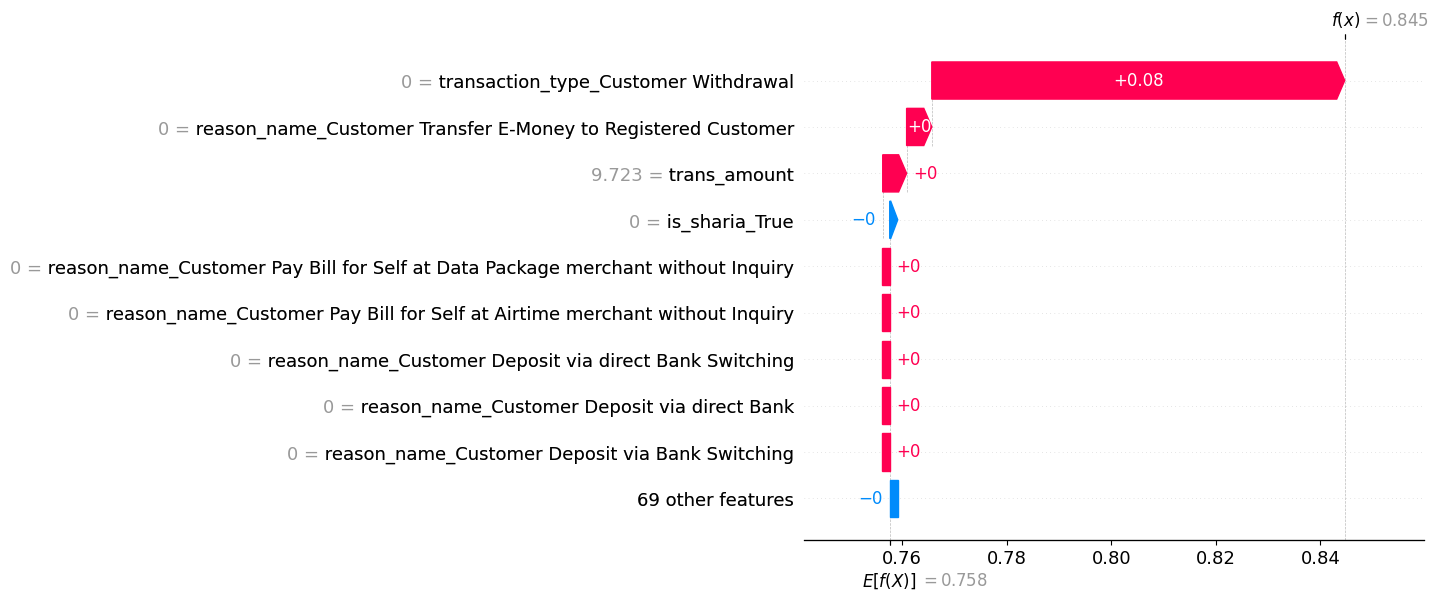

In [240]:
shap.plots.waterfall(shap_values[2, :, 1])  # class 1, index 2

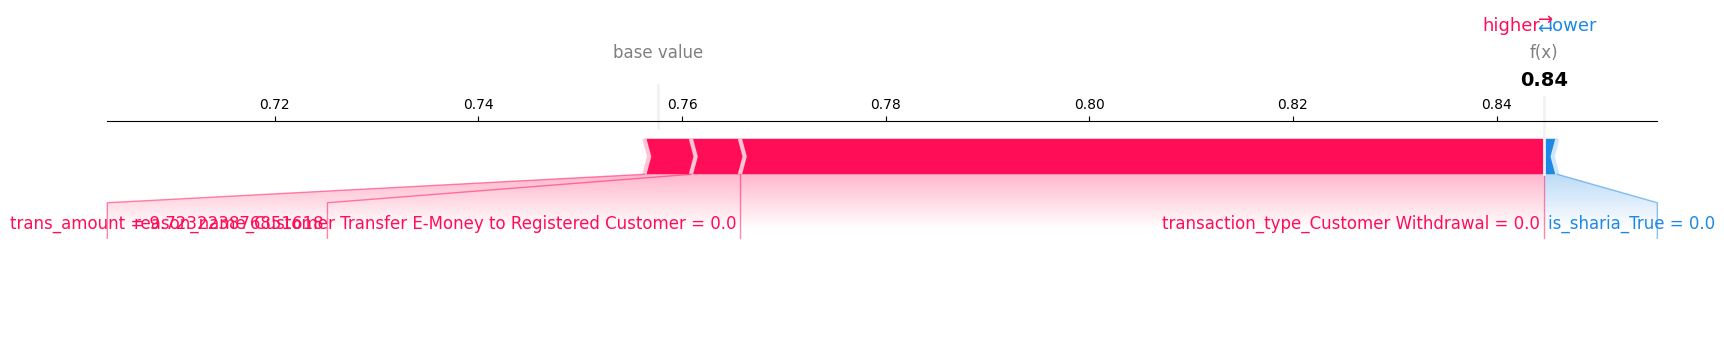

In [242]:
shap.initjs()
shap.force_plot(
    base_value=shap_values.base_values[2, 1],
    shap_values=shap_values.values[2, :, 1],
    features=X_test.iloc[2],
    feature_names=X_test.columns,
    matplotlib=True
)

> The model correctly predicted the transaction as fraud (class 1). The true label is "reported" and the predicted class is also 1, making this a true positive case.

- The model's base fraud probability is 0.76, but this transaction scores 0.84—indicating it's more likely to be fraud than the average case.
- High transaction amount and the absence of a typical reason code both significantly increase the likelihood of fraud.
- Not using a sharia account slightly reduces the model’s suspicion of fraud.

# **6. Conclusion & Recommendation**

## **a. Cost Analysis**

**1. Assumptions**  
| Parameter          | Value (IDR)              |
|--------------------|-------------------------|
| Investigation Cost | Rp 5,000 per transaction |
| Fraud Loss Cost    | Rp 10,000 per missed fraud |

**2. Confusion Matrix Recap**  
| Metric | Count |
|--------|-------|
| TP     | 145   |
| FP     | 6     |
| FN     | 8     |
| TN     | 32    |

**3. Calculations**

1. Without Model  
   - Total transactions = TP + FP + FN + TN = 145 + 6 + 8 + 32 = 191  
   - Total cost = 191 × Rp 5,000 = Rp 955,000

2. With Model (Threshold = 0.48)  
   - Transactions investigated = TP + FP = 145 + 6 = 151  
   - Investigation cost = 151 × Rp 5,000 = Rp 755,000  
   - Fraud loss cost = FN × Rp 10,000 = 8 × Rp 10,000 = Rp 80,000  
   - Total cost = Rp 755,000 + Rp 80,000 = Rp 835,000

**4. Summary Table**

| Scenario                | Investigation Cost (IDR)         | Fraud Loss (IDR)                          | Total Cost (IDR) |
|-------------------------|----------------------------------:|-------------------------------------------:|------------------:|
| Non-Model               | Rp 955,000 (All Transactions)     | Rp 0                                       | Rp 955,000        |
| Model (Threshold = 0.48)| Rp 755,000 (Predicted Positives) | Rp 80,000 (Fraud Predicted as Normal) | Rp 835,000        |

    - All Transactions = TP + TN + FP + FN
    - Predicted Positives = TP + FP
    - Fraud Predicted as Normal = FN


**5. Conclusion**
Using the model 
- The investigation savings amount to Rp 200,000, which is a 20.9% reduction in investigation cost compared to full manual review (from Rp 955,000 down to Rp 755,000).
- The overall total cost saved is Rp 120,000, or 12.6% lower than manually reviewing all transactions (Rp 835,000 vs Rp 955,000).
- Within the model's total cost, 9.6% comes from fraud losses due to undetected fraudulent transactions (false negatives).
- The remaining 90.4% of the total cost is spent on manual investigation, covering both correctly flagged fraud (TP) and false positives (FP).


## **b. Conclusion**

- To distinguish online gambling-related fraud from normal financial activity, we applied both exploratory and statistical approaches. Behavioral patterns, temporal anomalies, and channel-specific signals were extracted and statistically validated.
    - Key Findings:
        1. Temporal Behavior:
            - Fraud spikes during evenings (18:00–21:00) and weekends, aligning with online gambling activity.
            - Mid-month dates (14, 16, 17) and August carry elevated fraud risk—potentially tied to salary cycles or targeted events.
        2. Transaction Type & Channel:
            - Majority of fraud comes from E-Money transfers between registered customers.
            - Withdrawals, especially large-value ones, are strong fraud indicators.
        3. Value Patterns:
            - Daytime frauds have higher average value, though volume is higher at night.
            - Weekends show a rise in average fraud transaction size.
        4. 2023 Fraud Surge:
            - Tighter regulations triggered a spike in reported fraud, especially via regulated digital wallet channels.
    - Statistical Validation
        - Key signals—like party types, transaction context, channel, amount, duration, and timing, showed significant differences based on statistical tests that don’t assume normality.

- How can we build a model to predict fraud using reported as ground truth and unidentified as unknown?
    - We use semi-supervised Isolation Forest and supervised AdaBoost (lr=1, n=50) to detect fraud
    - High-confidence frauds from Isolation Forest train an AdaBoost regressor to estimate fraud confidence. High scores become pseudo-positives, low scores pseudo-negatives.
    - Combined with reported frauds, this labeled data trains the final model
    - Best model (AdaBoost) achieves PR AUC 99.27% at threshold 0.48, with F2-score 95.02% (fraud), F1-score 95.4% (fraud), 82.1% (non-fraud), and 92.67% accuracy.
    - The model reduces investigation cost by 20.9% and total cost by 9.6%, demonstrating strong operational efficiency.
    - SHAP analysis shows Customer Withdrawal dominates (~80%) as the top fraud signal, followed by E-money transfers, high Transaction Amount, and non-sharia accounts.

> Overall, we successfully detected online gambling fraud using PU learning with Isolation Forest and AdaBoost, highlighting customer withdrawals and e-money transfers as key fraud indicators.

## **b. Recommendation**

1. Intensify fraud monitoring on weekends and peak hours (18:00–21:00) when transaction volume and value spike.
2. Prioritize detection on e-wallet transfers between registered users and high-value withdrawals, key fraud channels.
3. Strengthen enforcement around August and mid-month dates (14, 16, 17) to address predictable fraud surges.
4. Deploy the model to reduce investigation and overall fraud handling costs.
5. Incorporate SHAP-based insights into monitoring dashboards to track top fraud drivers like customer withdrawals and transaction amounts.